<a href="https://colab.research.google.com/github/chloeczerwinski/Portfolio/blob/main/Czerwinski_Chloe_Main_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12-9-2025
Chloe Czerwinski

### CMPINF 2100 FINAL: Can We Predict the Next "Popular" Spotify Song Based on Track Features?

### Scope

In this report I will analyze Spotify song data from the date 1-21-2020 to predict a song's popularity based on its musical and data features provided to me through Tidy Tuesday's website. By the end of this report, we will understand which song features best predict popularity and see these results through EDA, clustering, and modeling.

### Sections:
#### * Introduction
#### * EDA
#### * Clustering
#### * Models: Fitting & Interpretation
#### * Models: Predictions
#### * Models: Performance & Validation


## Introduction: From Regression to Binary Classification

In the previous Spotify Report, I used regression to explore `track_popularity`. I noted that the results would be excellent for mid-range popular songs since most of the data received from Tidy Tuesday had scores between 40-60, and would be less accurate for scores above 70 since there were fewer tracks. Additionally, with so many tracks that have a score of 0, this led me to conclude that the best approach in the final Spotify report would be to use `binary classification`! Using binary classification will be easier to classify scores above 60 as the "event" (very popular) and scores below 60 as the "non-event" (not very popular). I chose the score 60 because anything above 60 was not enough tracks to analyze and would affect processes throughout the report.

### Major Findings

The major findings in this set of data were minimal for the one goal of the report: what makes a track popular? The features that have the highest correlation to track popularity were (for continuous:)`energy`, `loudness`, `acousticness`, and (categorical:)`playlist genre` and `playlist subgenre`. These were confirmed through both parts- EDA exploration and the predictive models.  The most major finding of this report is that none of the categorical features and continuous features made a large impact on track popularity. This tells us that there are more external influences that have a profound impact on track popularity such as branding, sales, marketing, social media, country location, etc.

Overall, a categorical variable like playlist genre and playlist subgenre paired with the top continuous variables created the best model to predict a popular track.

### Inputs that influence the response/outcome the most:
`energy`, `loudness`, `acousticness`, and `playlist genre` and `playlist subgenre`

### EDA Helpfulness:
EDA helped identify similar trends and relationships as the predictive models. The EDA process showed that energy, loudness, acousticness, and playlist genre were the most correlated to track popularity. The same results were shown in the predictive model's behavior.

### Clustering:

I created 3 clusters which were chosen by executing the elbow method.

Overall, cluster 2 had the highest popularity count of 31%.

* Cluster 0 and 2 have higher `energy` than cluster 1
* Cluster 2 has the highest `danceability` followed by 1 then 0.. which is interesting that cluster 0 had high energy though!
* Clusters 0 and 2 have low `acousticness`, meaning they use electric amplification instruments. However, cluster 1 varies a lot on whether there is use of electric amplification instruments or not!

Cluster 2 has high energy which aligns with the best predictive model.

### Skills Learned from Project & Takeaways:

The skills I learned going through this project are mainly how to create, validate, and interpret models. More importantly the reason we do this is to be able to create data that is easy to visualize to the end customer which may be cross functional teams and executives at a business. Even though my #1 personality trait is analytical (from Clifton Strengths test) this project really helped me be more peculiar, detail-oriented- and not just look at a graph/chart- and think it's "good enough". There's a lot of work that goes into the pre-process of what even goes into a chart. Additionally, some charts can be misleading based on how they can be scaled, and this project helped me see how easy it is to show either wrong, misleading, and unimportant data that could easily confuse someone reading the report to make business decisions.


## Variables

**Identifying inputs**: Features like danceability, energy, loudness, speechiness, tempo, duration_ms, acousticness, instrumentalness, liveness, and valence explain or predict the response. These are "inputs" that could determine and outcome (popularity).

Mode, key, playlist_genre, and playlist_subgenre will be used as categorical- They are categories, for example, minor and major are categories of mode. These are not outcomes of something.

**Identifying response/output/target variables**: The track_popularity column, since this is what we are trying to predict. Popularity will be the outcome of the identifying inputs.

**List of variables NOT used to anlyze in this report**: ID's and text identifyers like track_id, track_name, playlist_id, playlist_name, track_album_id, track_album_name; as they do not explain popularity and don't have analytical meaning. These 'names' would be more useful if I was writing a report on what names, letters, and emojis are more likely to get a person to click on a playlist or listen to a song.


## EDA: Basic Information
* Import Tidy Tuesday Data from January 2020 and explore the data set.
* Column names and data types of the values in the columns
* Variable names
* Number of rows and columns
* Missing values in the data set
* Unique values in the data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
songs = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [ ]:
df= pd.read_csv(songs)

In [ ]:
# name of columns and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# 32,833 rows and 23 columns

df.shape

(32833, 23)

In [ ]:
# number of missings in data- 15

df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
# number of unique values before cleaning the data (removing the missing values)

df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [ ]:
# drop missings

df = df.dropna()

In [ ]:
df.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

I dropped the missings because they were VERY minimal in a set of well over 20,000 rows. The tracks that had 0 but could have been averaged would have not made a huge difference.

value_counts().value_counts() below shows that there is 1 song that appears in 10 rows, 2 songs that appear in 9 rows, etc.

For modeling purposes, I am removing songs that appear in more than one row, indicating that they appear in more than 1 playlist, to prevent repeated playlist entries from biasing the model. This could slightly downweight the more popular songs that appear in multiple playlists.

For this next section of code I will be using the coding in the Spotify Songs Final Project Feedback we were given that references how to clear the duplicated data.

In [ ]:
df.track_id.value_counts().value_counts()

count
1     25187
2      2383
3       510
4       142
5        60
6        35
7        17
8        15
9         2
10        1
Name: count, dtype: int64

In [ ]:
df.playlist_id.nunique()

471

In [ ]:
# Source from Spotify Project html

df.groupby(['track_id']).\
aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
          num_valence_values = ('valence', 'nunique')).\
reset_index()

track_id  num_track_pop_values  num_valence_values
0      0017A6SJgTbfQVU2EtsPNo                     1                   1
1      002xjHwzEx66OWFV2IP9dk                     1                   1
2      004s3t0ONYlzxII9PLgU6z                     1                   1
3      008MceT31RotUANsKuzy3L                     1                   1
4      008rk8F6ZxspZT4bUlkIQG                     1                   1
...                       ...                   ...                 ...
28347  7zxRMhXxJMQCeDDg0rKAVo                     1                   1
28348  7zyLObYw4QUKQDyZOb4J0Y                     1                   1
28349  7zycSpvjDcqh6YT1FEl2kY                     1                   1
28350  7zye9v6B785eFWEFYs13C2                     1                   1
28351  7zzZmpw8L66ZPjH1M6qmOs                     1                   1

[28352 rows x 3 columns]

In [ ]:
# Source from Spotify Project html

df.groupby(['track_id']).\
aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
          num_valence_values = ('valence', 'nunique')).\
reset_index().\
nunique()

track_id                28352
num_track_pop_values        1
num_valence_values          1
dtype: int64

In [ ]:
track_counts= df['track_id'].value_counts()

In [ ]:
# Filtering the data frame to only keep tracks that appear once.

df1=df[df['track_id'].isin(track_counts[track_counts==1].index)]

In [ ]:


df1['track_id'].duplicated().sum()

np.int64(0)

In [ ]:
df1.track_id.value_counts().value_counts()

count
1    25187
Name: count, dtype: int64

In [ ]:
df1.shape

(25187, 23)

In [ ]:
# How many tracks have a score of 0?

(df1['track_popularity']==0).sum()

np.int64(2535)

After removing duplicate tracks and dropped missing values, there are a few extra ways to trim some outliers. According to Tidy Tuesdays website, song popularity is on a scale of 0-100 where higher is better, so it is safe to say that anything under 5 is not popular. I will remove songs with a score of 5 or less. There is not enough scores of 0 for very popular artists to greatly affect the data.

In [ ]:
df2 = df1[df1['track_popularity'] >=5]

In [ ]:
#This leaves me with 21,293 rows of unique songs.

df2.shape

(21293, 23)

## Visualization: Marginal Distributions of Variables with Visualizations

Next I will define what is considered a continuous variable and categorical variable.

## Continuous Variables:

These are continuous variables because they need to be numeric, for example, a number in range 0-1.

* danceability
* energy
* loudness
* acousticness
* instrumentalness
* speechiness
* liveness
* valence
* tempo
* duration_ms
* track_popularity

## Categorical Variables:

* `mode` is categorical because it represents major(1) and minor(0) which are categories, and leaving it numeric would produce an incorrect regression model that doesn't make sense. The numbers 0 and 1 do not have a mathematical meaning in this Spotify data.
* `key` is also a categorical variable since there are 12 pitches in western music according to Google. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected the value is -1, according to Tidy Tuesday.
* The object variables are also categorical (artists, genres, ID's, etc.). For the purpose of this report I will be using `playlist_genre` and `playlist_subgenre`.
* Later in this report track_popularity can be converted to a categorical variable with bins.

### Below is a brief overview of the marginal distributions of continuous numeric variables.

Included are categorical variables such as key, mode, playlist genre and playlist subgenre. For continuous features I will only show the top correlated variables to track popularity.

At first glance, we can see track_popularity is distributed fairly symmetrical. There are no extreme outliers that pull track_popularity to the left or right.

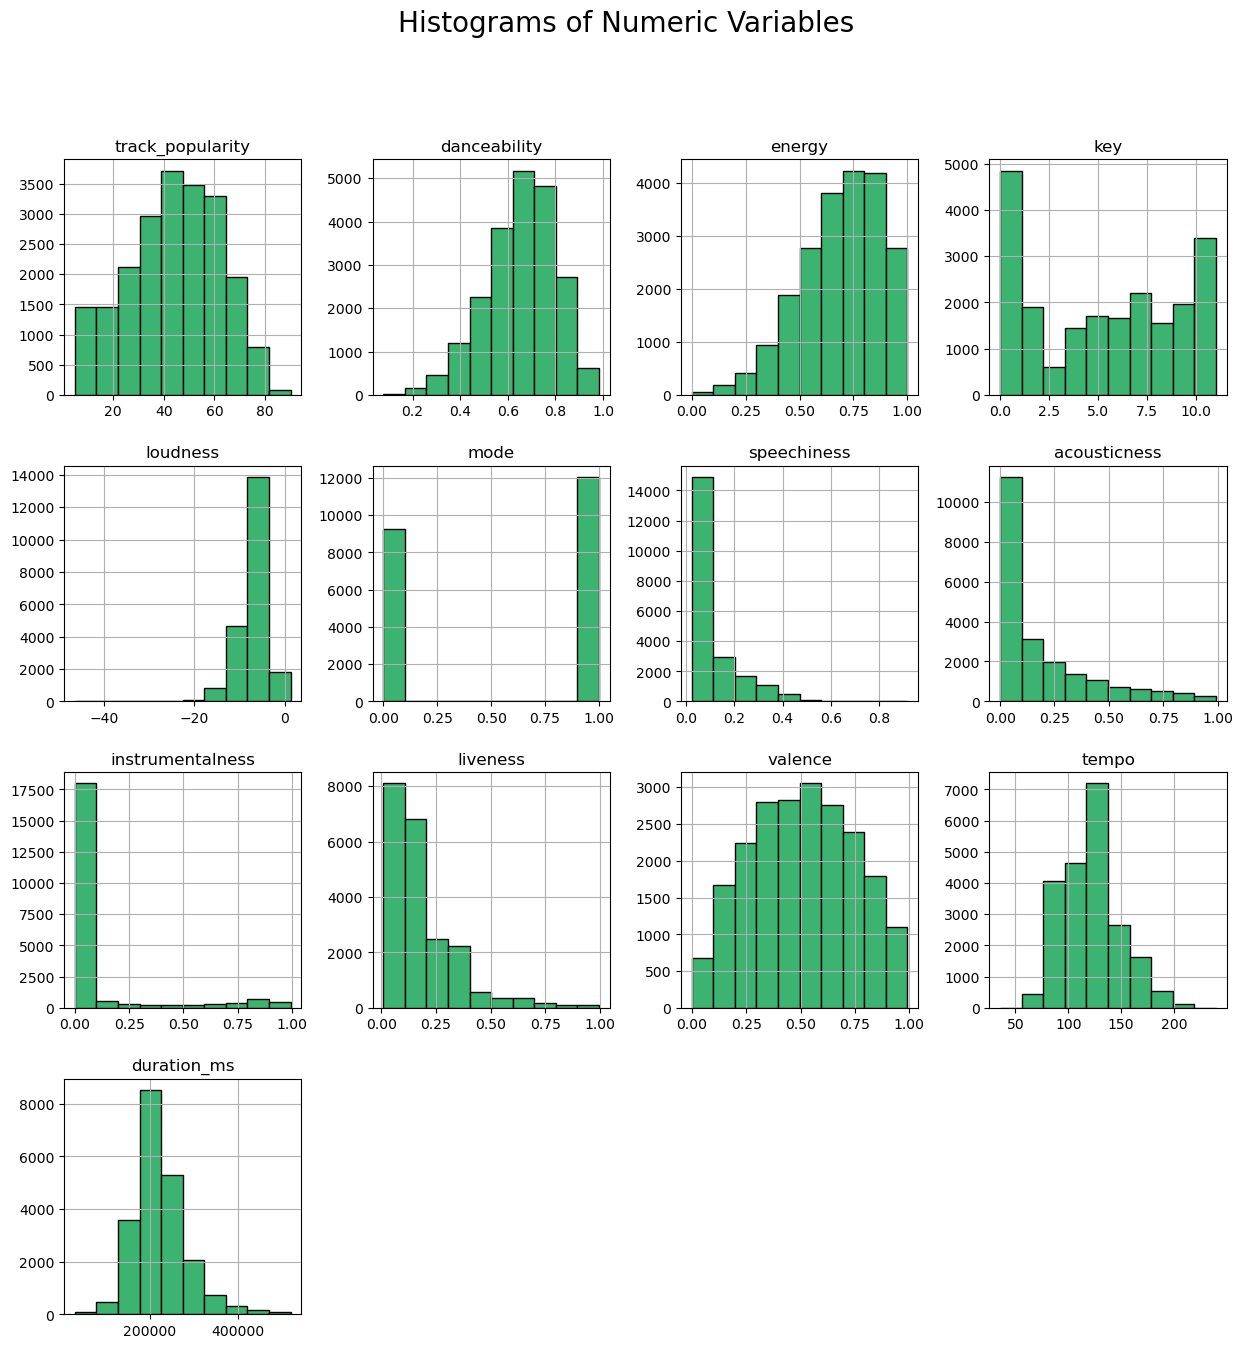

In [ ]:
# Histogram for variable's marginal distributions

df2.hist(figsize=(15,15), bins=10, color='mediumseagreen', edgecolor='black')

plt.suptitle('Histograms of Numeric Variables', fontsize=20)
plt.grid(False)
plt.show()

### Visualize the marginal distributions for categorical variables individually first with bar charts

### Categorical Variables: Bar Charts

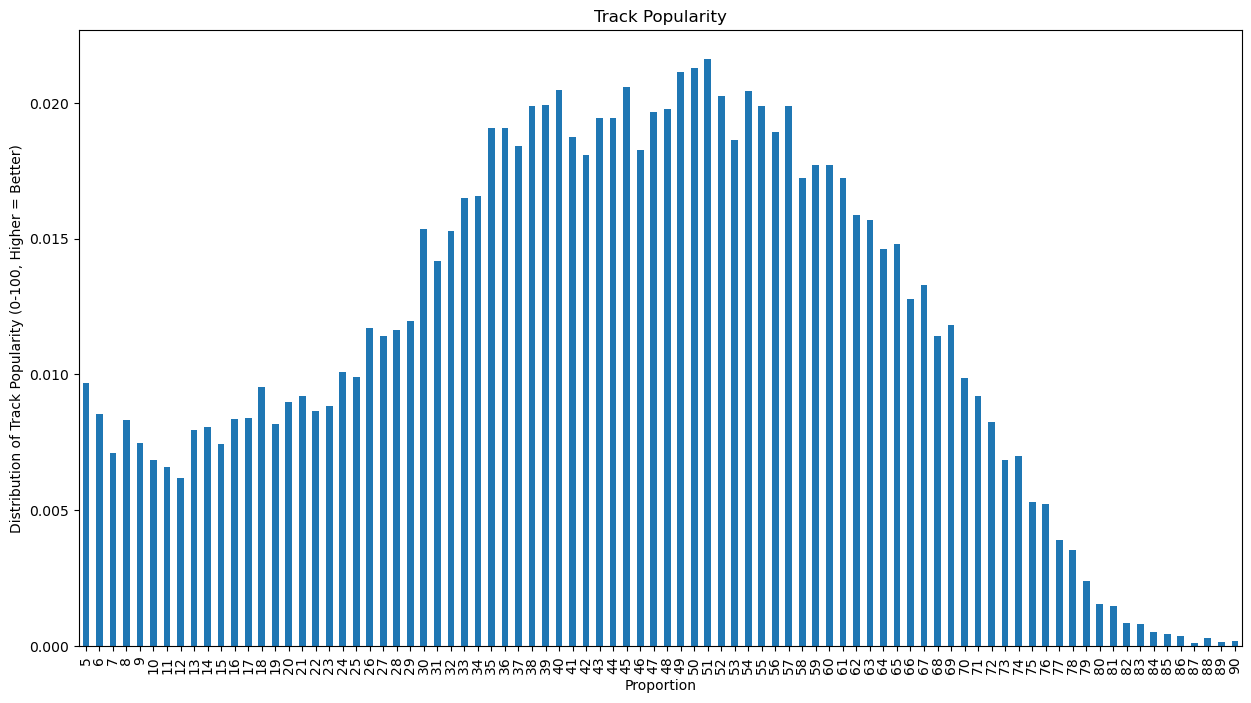

In [ ]:
# Bar Chart for categorical variables individually - This chart shows the data may be better put in bins
# Also shows that many of the songs are average, which may make it harder for me to find popularity features in this set

fig, ax = plt.subplots(figsize=(15,8))

df2.track_popularity.value_counts(normalize=True).sort_index().plot( kind='bar', ax=ax )

plt.title('Track Popularity')
plt.xlabel('Proportion')
plt.ylabel('Distribution of Track Popularity (0-100, Higher = Better)')
plt.show()

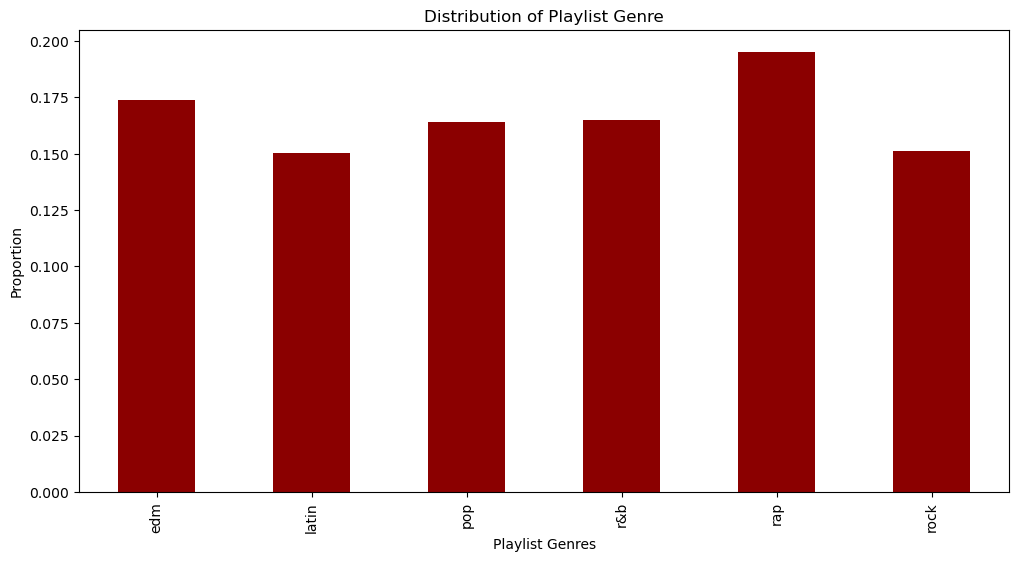

In [ ]:
# Bar Chart for categorical variables individually

fig, ax = plt.subplots(figsize=(12,6))

df2.playlist_genre.value_counts(normalize=True).sort_index().plot(kind='bar',ax=ax, color='darkred' )

plt.title('Distribution of Playlist Genre')
plt.xlabel('Playlist Genres')
plt.ylabel('Proportion' )
plt.show()

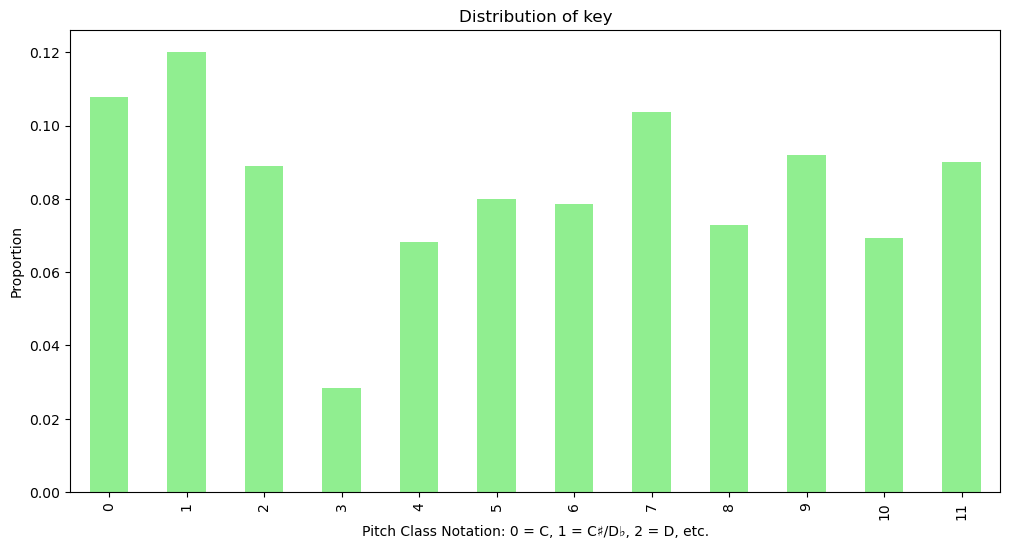

In [ ]:
# Bar Chart for categorical variables individually
# Most songs are in key 0, 1, 7, 8 and 9

fig, ax = plt.subplots(figsize=(12,6))

df2.key.value_counts(normalize=True).sort_index().plot( kind='bar', ax=ax, color='lightgreen' )

plt.title('Distribution of key')
plt.xlabel('Pitch Class Notation: 0 = C, 1 = C♯/D♭, 2 = D, etc.')
plt.ylabel('Proportion' )
plt.show()

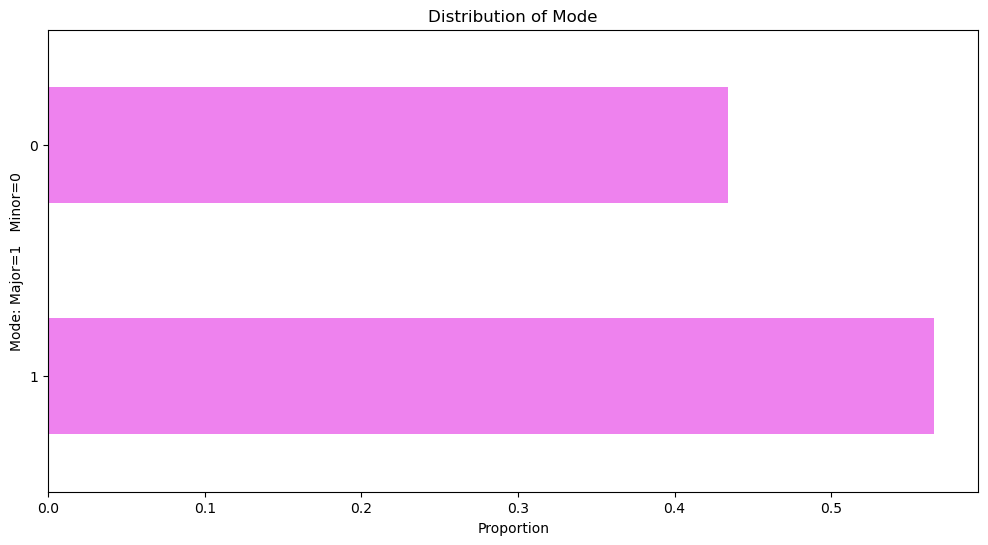

In [ ]:
# Bar Chart for categorical variables individually
# There is not a large proportional difference between modes

fig, ax = plt.subplots(figsize=(12,6))

df2['mode'].value_counts(normalize=True).plot( kind='barh', ax=ax, color='violet' )

plt.title('Distribution of Mode')
plt.xlabel('Proportion')
plt.ylabel('Mode: Major=1   Minor=0')
plt.show()

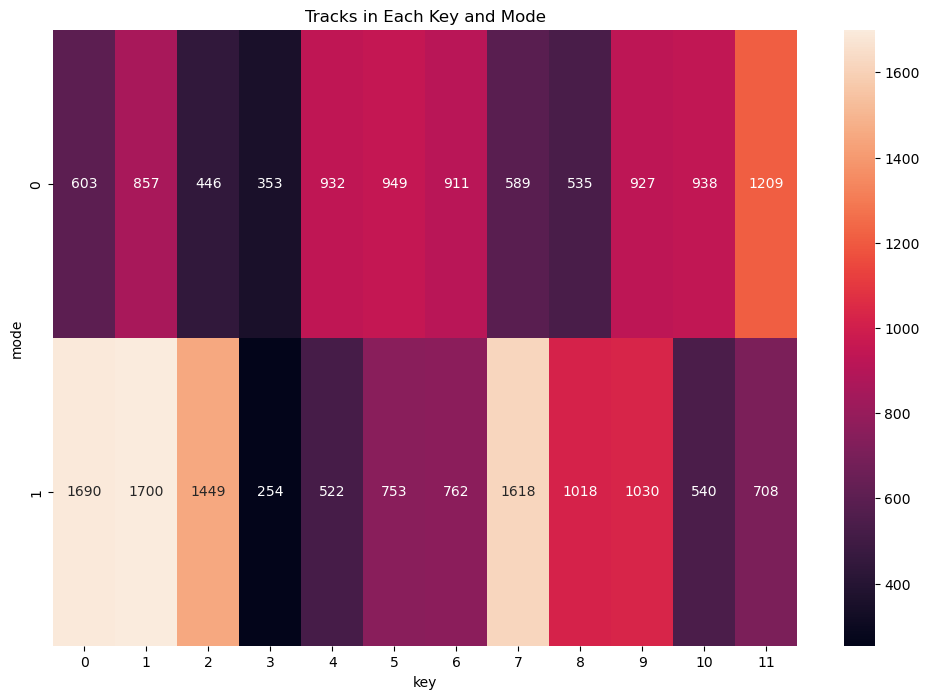

In [ ]:
# Tracks in each Key and Mode combined

fig, ax=plt.subplots(figsize=(12,8))

sns.heatmap(pd.crosstab(df['mode'], df2['key']), ax=ax,
           annot=True, annot_kws={'size':10}, fmt='d')

plt.title('Tracks in Each Key and Mode')
plt.show()

Most tracks are in Key 0 (1690), 1 (1700), and 7 (1618) in mode (major) 1.

Sourced from Google AI response to the definition of major and minor in mode:

Major mode: Predominantly uses the intervals of the major scale, creating a brighter, more "major" feeling.

Minor mode: Predominantly uses the intervals of the minor scale, creating a darker, more "minor" feeling.
Based on these definitions, most tracks being in key 0, 1, and 7 in major mode could mean these songs are creating a more happier or bright feeling. Is this actually true? We will find out when we plot these variables together further down in the report.

## Continuous Variables Marginal Distributions

These are the most important continuous variables that are most correlated to track popularity.

The descriptions of each variable and the ranges of measurement are from Tidy Tuesday's website.

### `Danceability` is visualized through a histogram as a continuous variable on a scale of 0-1, measuring how "danceable" the track is.

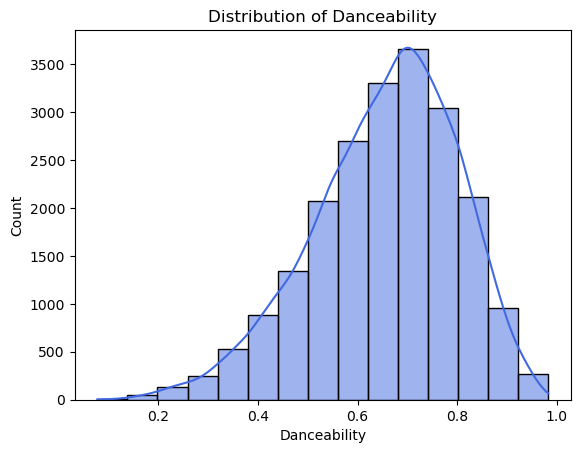

In [ ]:
sns.histplot(data=df2, x='danceability', bins=15, kde=True, color='royalblue')

plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

Danceability peaks on the higher side, meaning that the tracks in this set have higher danceability.

### `energy` is visualized through a histogram as a continuous variable from 0-1 and represents perceptual features- contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

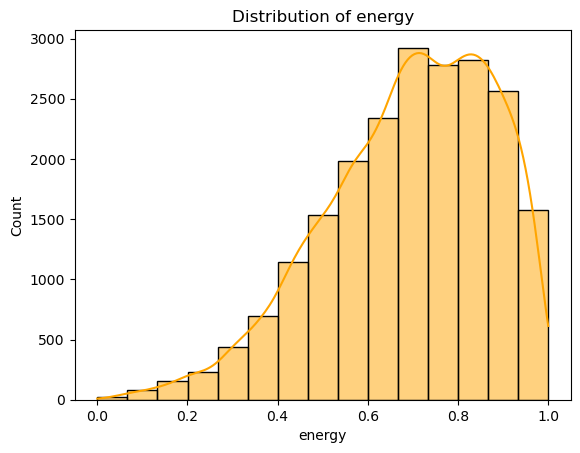

In [ ]:
sns.histplot(data=df2, x='energy', bins=15, kde=True, color='orange')

plt.title('Distribution of energy')
plt.xlabel('energy')
plt.ylabel('Count')
plt.show()

Energy peaks on the higher side, meaning that the tracks in this data set have higher energy.

### `acousticness` is visualized through a histogram as a continuous variable and is measured 0-1, where 1 represents high confidence the track is acoustic (no elecrtic amplification instruments).

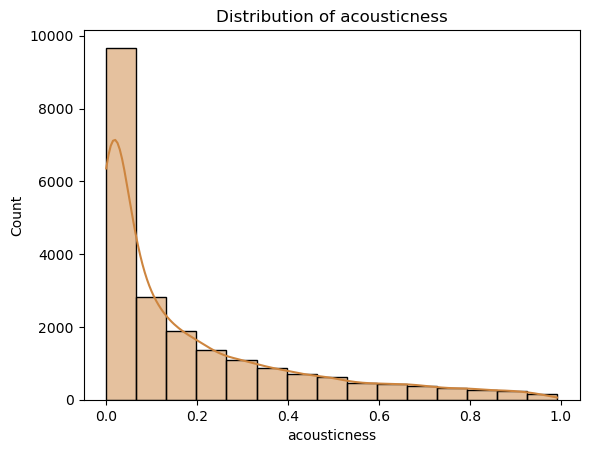

In [ ]:
sns.histplot(data=df2, x='acousticness', bins=15, kde=True, color='Peru')

plt.title('Distribution of acousticness')
plt.xlabel('acousticness')
plt.ylabel('Count')
plt.show()

Most tracks fall within the lowest range of the variable. A 0 indicates most of the distribution of tracks falls in tracks that use electric amplification instruments, for example, an electric guitar, bass, synthesizers, drum machines, etc.

### `valence` is visualized through a histogram as a continuous variable with a range of 0-1 describing musical positiveness.

High valence is more positive (e.g. happy, cheerful, euphoric)

Low valence is more negative (e.g. sad, depressed, angry)

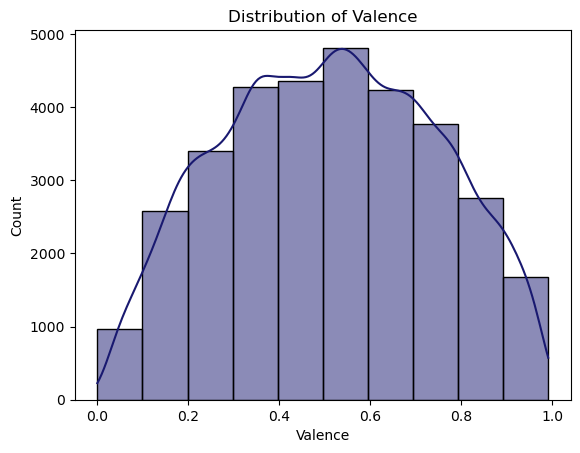

In [ ]:
sns.histplot(data=df, x='valence', bins=10, kde=True, color='midnightblue')

plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

This histogram shows symmetry, which is means there is a mix of moods in this data set!

### `loudness` is visualized through a histogram as a continuous variable and is measured in decibels (dB). The values range between -60 dB (quieter) and 0 dB (louder).

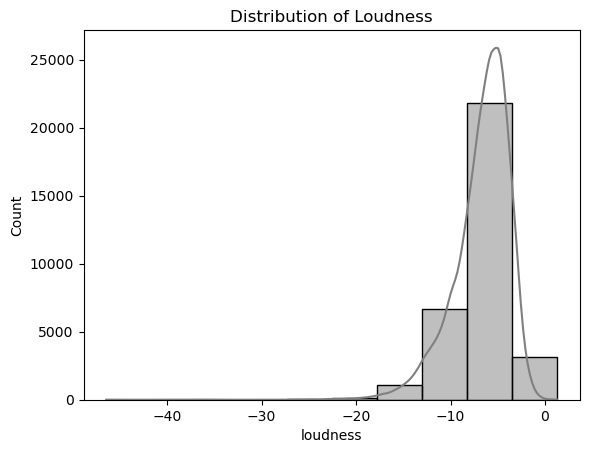

In [ ]:
sns.histplot(data=df, x='loudness', bins=10, kde=True, color='0.5')

plt.title('Distribution of Loudness')
plt.xlabel('loudness')
plt.ylabel('Count')
plt.show()


The histogram shows many tracks are on the louder side! (Or, just the normal "loudness" range of a typical song.)

## Summarize Categorical to Continuous Relationships

Previously I had used box and violin plots to visualize ALL variables, but this time I first will see the summary data for the continuous variables in each categorical variable and then visualize ones that stand out.

In [ ]:
# Summary data of Mode with continuous variables (mean and standard deviation)

df2.groupby('mode')[['danceability','energy','acousticness','valence']].agg(['mean','std'])

danceability              energy           acousticness            \
             mean       std      mean       std         mean       std   
mode                                                                     
0        0.663121  0.141588  0.692144  0.181996     0.184165  0.223253   
1        0.647898  0.148810  0.690574  0.189359     0.187267  0.234012   

       valence            
          mean       std  
mode                      
0     0.510585  0.233454  
1     0.506707  0.234817

In [ ]:
# Summary data of Mode with continuous variables (mean and standard deviation)

df2.groupby('key')[['danceability','energy','acousticness','valence']].agg(['mean','std'])

danceability              energy           acousticness            \
            mean       std      mean       std         mean       std   
key                                                                     
0       0.651030  0.142400  0.675078  0.190392     0.202459  0.238682   
1       0.682848  0.139057  0.696235  0.181670     0.158724  0.209967   
2       0.638207  0.150989  0.704410  0.183608     0.172044  0.225314   
3       0.623516  0.151607  0.675934  0.205489     0.233777  0.260714   
4       0.638081  0.150701  0.682570  0.190534     0.193985  0.229980   
5       0.649192  0.142680  0.682490  0.189590     0.200412  0.238140   
6       0.659896  0.142624  0.708202  0.183261     0.164195  0.215457   
7       0.651708  0.147653  0.695672  0.184216     0.182015  0.225410   
8       0.656077  0.147220  0.694742  0.183589     0.189037  0.228448   
9       0.643145  0.146780  0.679285  0.186795     0.205966  0.239450   
10      0.666065  0.147338  0.675863  0.191034     0.205041  0.243770   
11      0.663939  0.141589  0.711576  0.174839     0.167712  0.214818   

      valence            
         mean       std  
key                      
0    0.516023  0.239287  
1    0.505091  0.234617  
2    0.484761  0.239512  
3    0.504986  0.236853  
4    0.482485  0.238600  
5    0.507058  0.230356  
6    0.525065  0.226456  
7    0.503465  0.231054  
8    0.502562  0.232661  
9    0.525607  0.234499  
10   0.512218  0.236178  
11   0.524256  0.227593

In [ ]:
# Summary data of Mode with continuous variables (mean and standard deviation)

df2.groupby('playlist_genre')[['danceability','energy','acousticness','valence']].agg(['mean','std'])

danceability              energy           acousticness  \
                       mean       std      mean       std         mean   
playlist_genre                                                           
edm                0.662284  0.124755  0.802244  0.140946     0.087053   
latin              0.708668  0.120425  0.700492  0.158153     0.227909   
pop                0.638545  0.127649  0.696930  0.175842     0.174677   
r&b                0.665499  0.137822  0.584290  0.180452     0.271477   
rap                0.714500  0.136850  0.640418  0.177176     0.207646   
rock               0.519447  0.140076  0.730599  0.200729     0.148651   

                           valence            
                     std      mean       std  
playlist_genre                                
edm             0.154237  0.405638  0.231201  
latin           0.225452  0.599701  0.226987  
pop             0.224413  0.503081  0.221076  
r&b             0.262779  0.533510  0.228783  
rap             0.231329  0.500276  0.225403  
rock            0.218903  0.524613  0.229918

Based on these 4 categorical variables, it is worth visualizing the standard deviations that are lower since that means most of the tracks cluster around the mean. Additionally, it is worth visualizing the means with a higher value which tells us those tracks under that continuous variable and categorical variable category have a higher popularity score.

Overall, most of the continuous variables between key and mode do not change their mean and standard deviataion much, which is not worth visualizing...

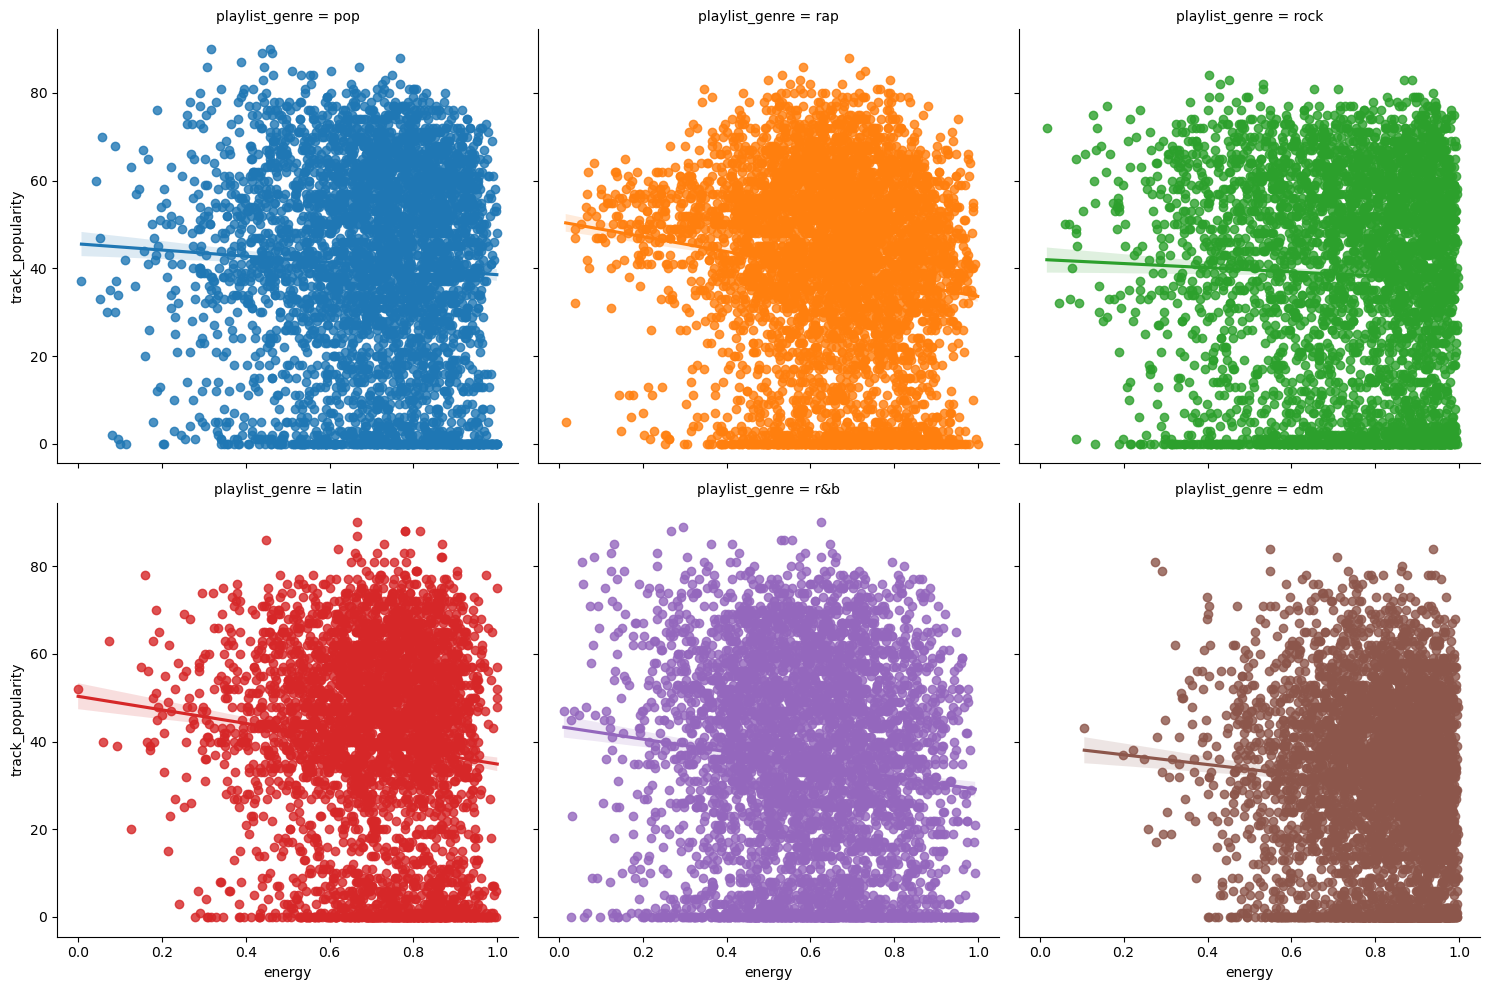

In [ ]:
sns.lmplot(data=df1, x='energy', y= 'track_popularity', hue='playlist_genre', col='playlist_genre', col_wrap=3)

plt.show()

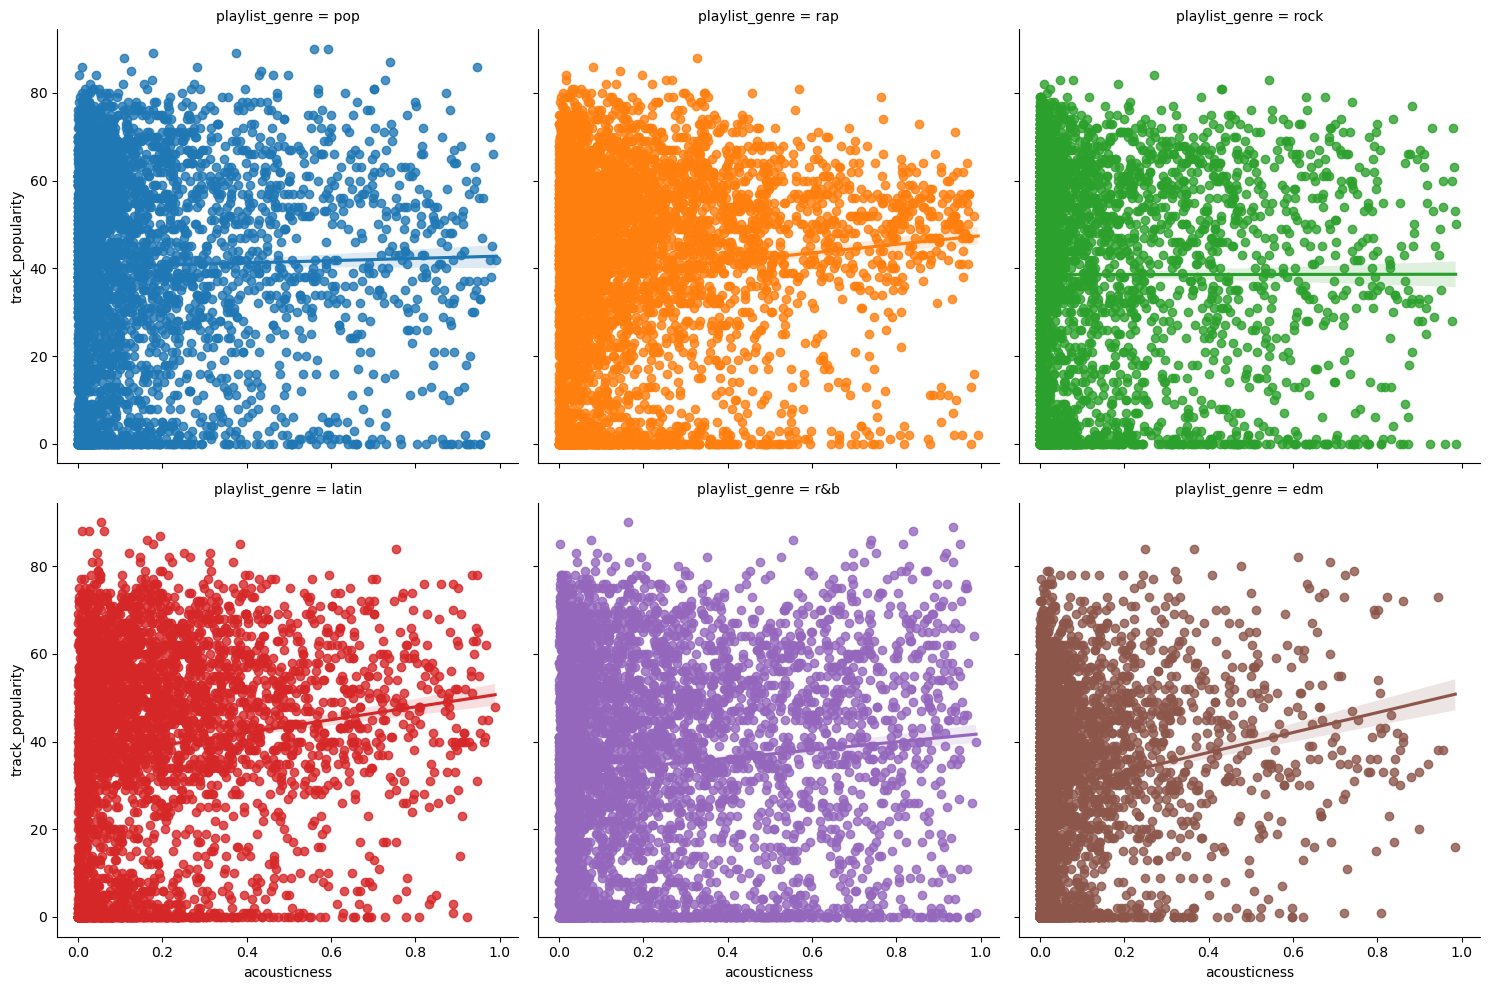

In [ ]:
sns.lmplot(data=df1, x='acousticness', y= 'track_popularity', hue='playlist_genre', col='playlist_genre', col_wrap=3)

plt.show()

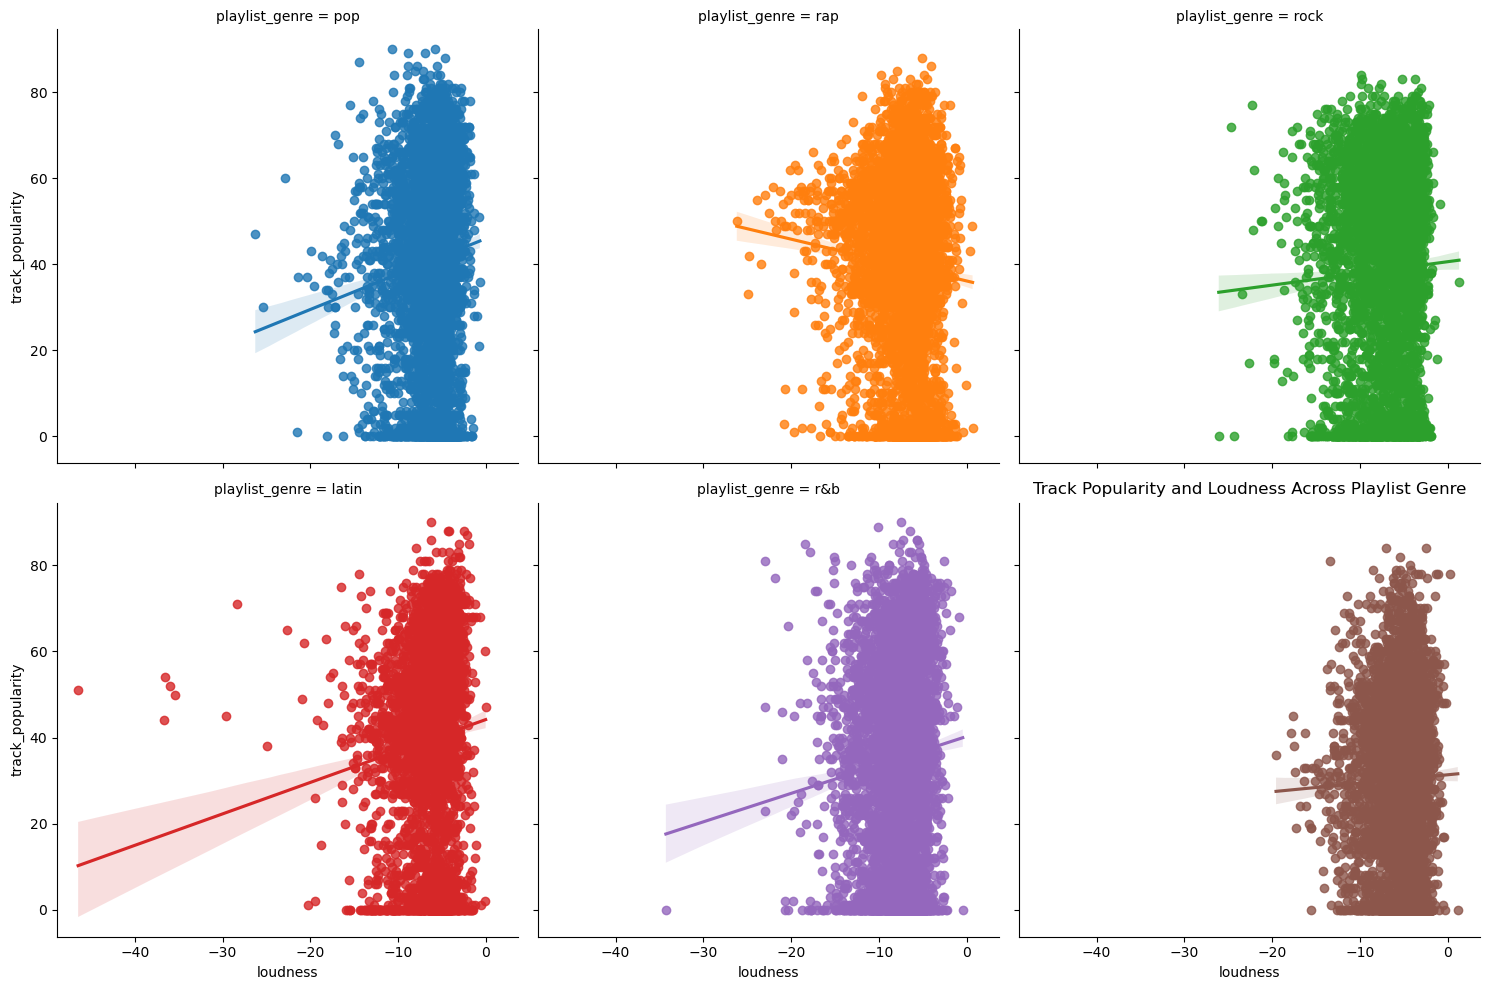

In [ ]:
sns.lmplot(data=df1, x='loudness', y= 'track_popularity', hue='playlist_genre', col='playlist_genre', col_wrap=3)

plt.title('Track Popularity and Loudness Across Playlist Genre')
plt.show()

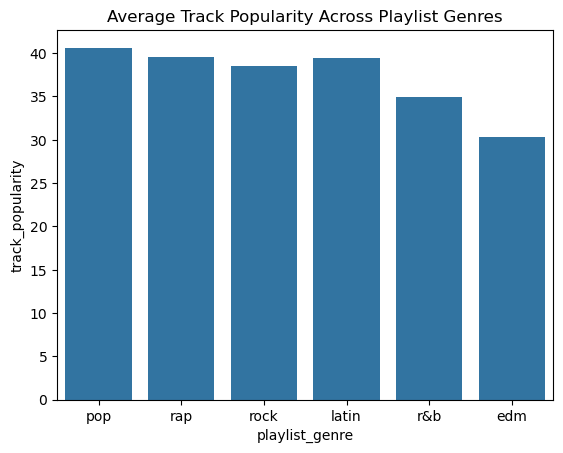

In [ ]:
sns.barplot(data=df1, x='playlist_genre', y='track_popularity', estimator='mean', errorbar=None)

plt.title('Average Track Popularity Across Playlist Genres')
plt.show()

Overall, the continuous variables with the most correlation to track popularity by genre are still not strong because the data is so varied, which is normal in a data set of music. Of course we are going to have popularity scores all over on the scale, and the bar chart shows most of the data sits around an average / slightly below average score.

"This also confirms my statement before that if I have mostly data for tracks that are not VERY popular, then this is a limit of the regression method and using track_popularity as a continuous variable." I said this in my last report, but I find after completing the project with binary classification, this seems to still be true! If we have mostly data for average tracks then that is a limit of this particular data set.

## Continuous to Continuous Relationships

#### Let's see visually the correlation between the continuous variables

In [ ]:
correlation= df2[['danceability','energy','acousticness','valence','loudness','instrumentalness','liveness','tempo']].corr()

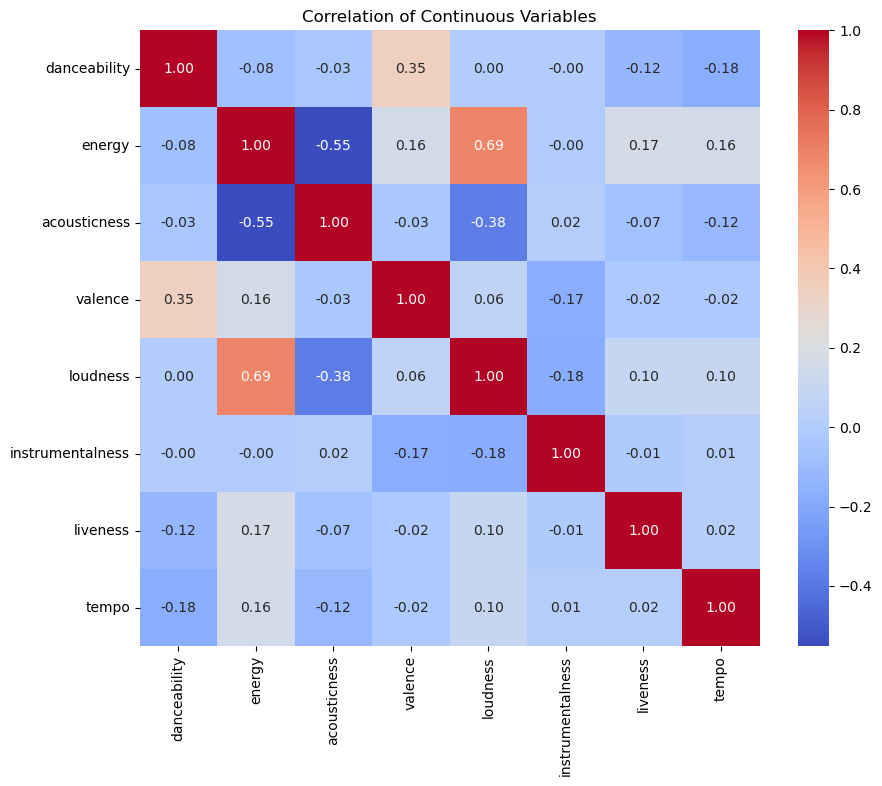

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={'size':10}, fmt='.2f')

plt.title('Correlation of Continuous Variables')
plt.show()

In this heatmap, we can see many continuous variables are NOT (barely) correlated.
* `Energy` and `loudness` have a high positive correlation. This is because loudness is in energy's feature description on Tidy Tuesday.
* `Energy` and `acousticness` have a negative correlation, which can make sense for tracks that have "high energy" instruments, drums, etc. vs very acoustic like a guitar, piano, which would be more "relaxing"/ less energy. Since the correlation is not strong that tells me there are quite a few tracks that are acoustic and high energy!
* The rest do not have enough significance to visualize.

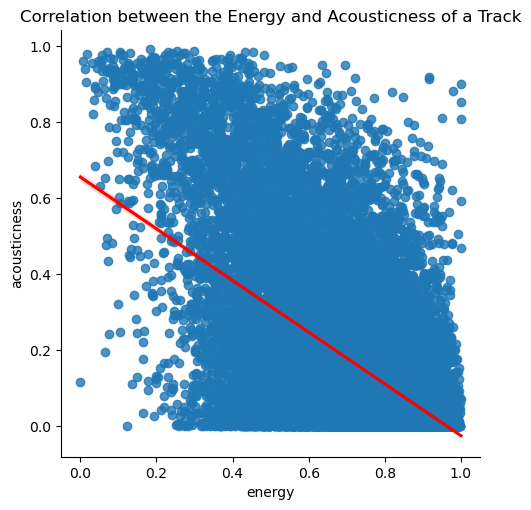

In [ ]:
sns.lmplot(data=df2, x='energy', y='acousticness', line_kws={"color": "red"})

plt.title('Correlation between the Energy and Acousticness of a Track')
plt.show()

## Turn the Spotify data into a binary classification problem!

In my previous project, I used regression. Again, the data we are using can find very accurate answers for mid-range popularity tracks since that's where most of the tracks are distributed, and would be less accurate for higher scores since there is less data. However, I am curious to see what the data looks like split apart between `not popular` and `popular` tracks. Since there is a large distribution difference between scores 5-69 and 70-100- that may not work. A little imbalance between the ranges 5-59 and 60-100 won't bias the models- logistic regression is meant to handle some imbalance! (Just not TOO much).

### Create the binary column
#### * 0 = Not Popular (Scores 5-59)
#### * 1 = Popular (Scores 60-100)

In [ ]:
# Create a new column for popular scores (60-100) and convert the true/false to 0 and 1

df2.loc[:,'track_popularity']=(df2['track_popularity']>=60).astype(int)

In [ ]:
# Verify popularity changed to 0's and 1's
# 4,544 songs are classified as popular and 16,749 tracks in Tidy Tuesday's data set are not popular

df2['track_popularity'].value_counts()

track_popularity
0    16749
1     4544
Name: count, dtype: int64

## Visualize distributions/relationships between continuous inputs

Let's look at the relationships between continuous inputs now broken up by popular vs not popular! We know that there are much more tracks that are not popular, but we are looking at if the disribution pattern are similar or not.

From the previous source, my EDA project, I will only look at the continuous relationships that had the highest correlation to track popularity! Please reference the EDA project for more information on all continuous variables, however, not all are important.

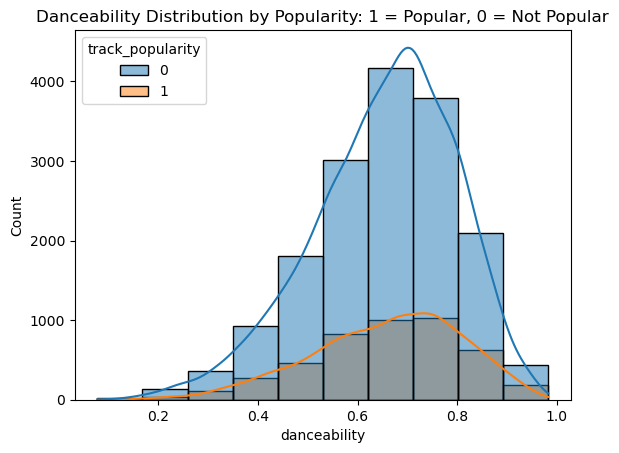

In [ ]:
sns.histplot(data=df2, x='danceability',hue='track_popularity', bins=10, kde=True)

plt.title('Danceability Distribution by Popularity: 1 = Popular, 0 = Not Popular')
plt.show()

While there is much more tracks that are not popular (as well as know) the pattern of the kde is actually very similar between popular and not popular songs, peaking between 0.6-0.8.

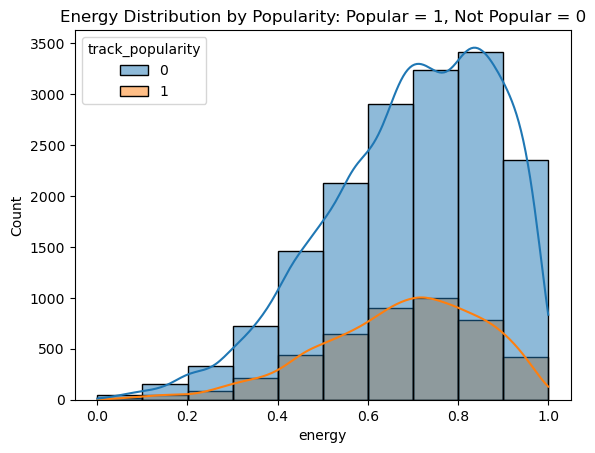

In [ ]:
sns.histplot(data=df2, x='energy',hue='track_popularity', bins=10, kde=True)

plt.title('Energy Distribution by Popularity: Popular = 1, Not Popular = 0')
plt.show()

Energy distribution between both has the same pattern peaking between 0.6-0.8.

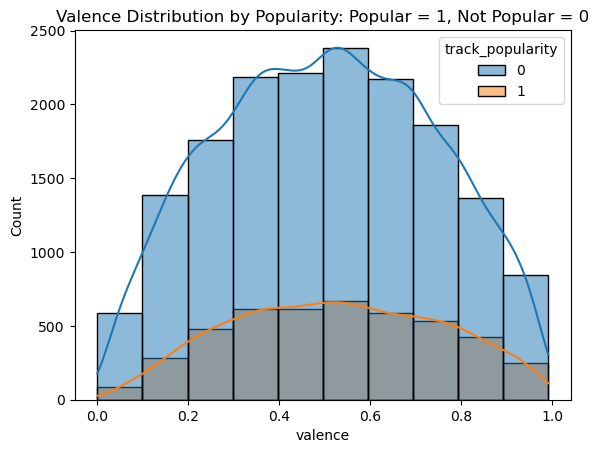

In [ ]:
sns.histplot(data=df2, x='valence',hue='track_popularity', bins=10, kde=True)

plt.title('Valence Distribution by Popularity: Popular = 1, Not Popular = 0')
plt.show()

Valence reveals similar distribution between popular and not popular- there's a mix of emotions in the tracks!

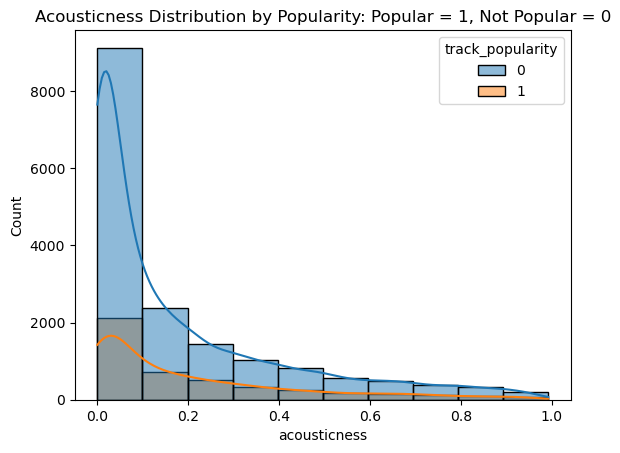

In [ ]:
sns.histplot(data=df2, x='acousticness',hue='track_popularity', bins=10, kde=True)

plt.title('Acousticness Distribution by Popularity: Popular = 1, Not Popular = 0')
plt.show()

Acousticness has the same pattern between not popular and popular. Most tracks fall within the lowest range of the variable. A 0 indicates most of the distribution of tracks falls in tracks that use electric amplification instruments, for example, an electric guitar, bass, synthesizers, drum machines, etc.

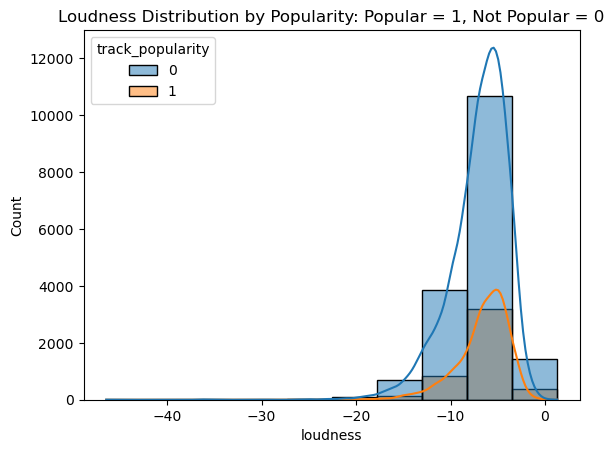

In [ ]:
sns.histplot(data=df2, x='loudness',hue='track_popularity', bins=10, kde=True)

plt.title('Loudness Distribution by Popularity: Popular = 1, Not Popular = 0')
plt.show()

The distribution of loudness for popular vs not popular tracks is the same.

## Number of Observations of Each Categorical Variable Sorted by Popular vs. Not Popular


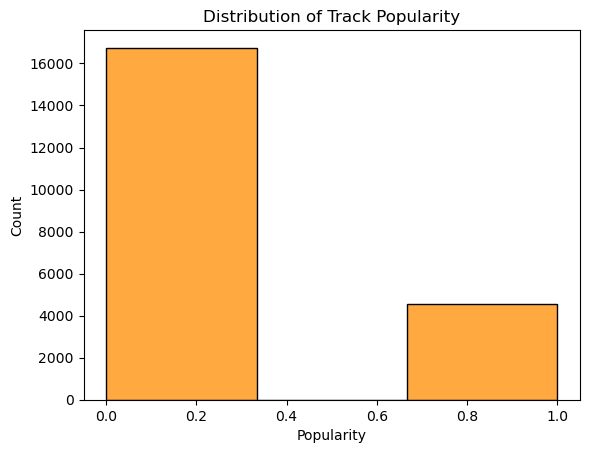

In [ ]:
sns.histplot(data=df2, x='track_popularity', bins=3,  color='darkorange')

plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

Most of the tracks as we know are not popular, and the distribution for popular tracks closer to 0.7-1.0 are significantly less...

### `playlist_subgenre` distribution between popular and not popular

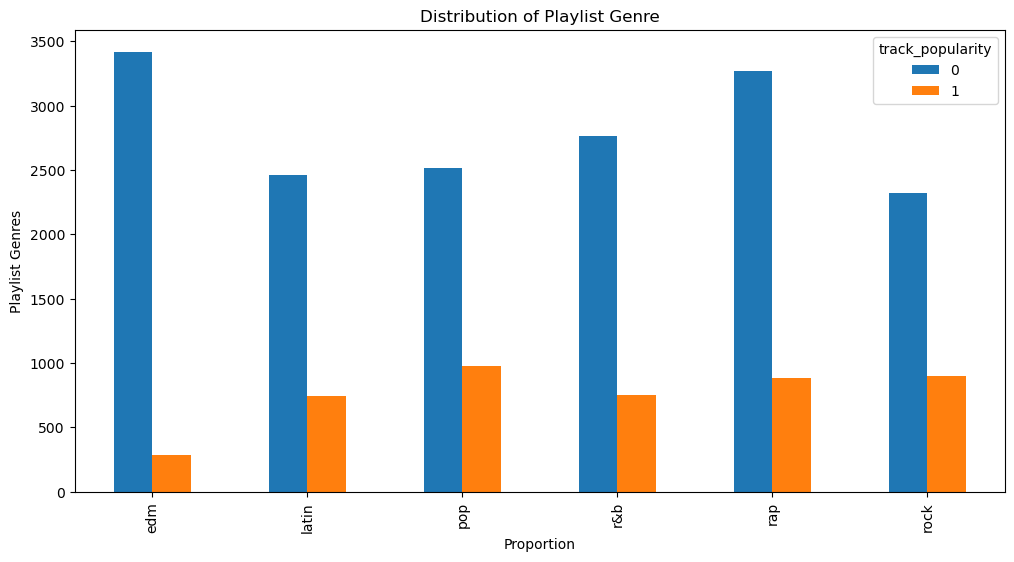

In [ ]:
# Bar Chart for categorical variables individually- Count number of tracks by popular vs not popular by using .unstack()

fig, ax = plt.subplots(figsize=(12,6))

df2.groupby(['playlist_genre', 'track_popularity']).size().unstack().plot(kind='bar', ax=ax)

plt.title('Distribution of Playlist Genre')
plt.xlabel('Proportion')
plt.ylabel('Playlist Genres' )
plt.show()

I am suprised by the results of this bar chart above. The three most popular genres are pop, rock, and rap. In my previous EDA project, I had an idea that edm was very popular- but clearly that is untrue. Let's see the actual number's below.

In [ ]:
# Count number popular vs not popular

df2.groupby(['playlist_genre', 'track_popularity']).size()

playlist_genre  track_popularity
edm             0                   3418
                1                    287
latin           0                   2462
                1                    742
pop             0                   2515
                1                    981
r&b             0                   2763
                1                    751
rap             0                   3273
                1                    884
rock            0                   2318
                1                    899
dtype: int64

## Clustering (Unsupervised)

First I will perform clustering which is unsupervised. Since I did change my project to a binary classification problem, later we will go through classification.

As a refresher, let's take a look at the correlation of the continuous variables, and choose the 3 that have the "highest" correlation.

In [ ]:
numeric_features_cont = df2[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

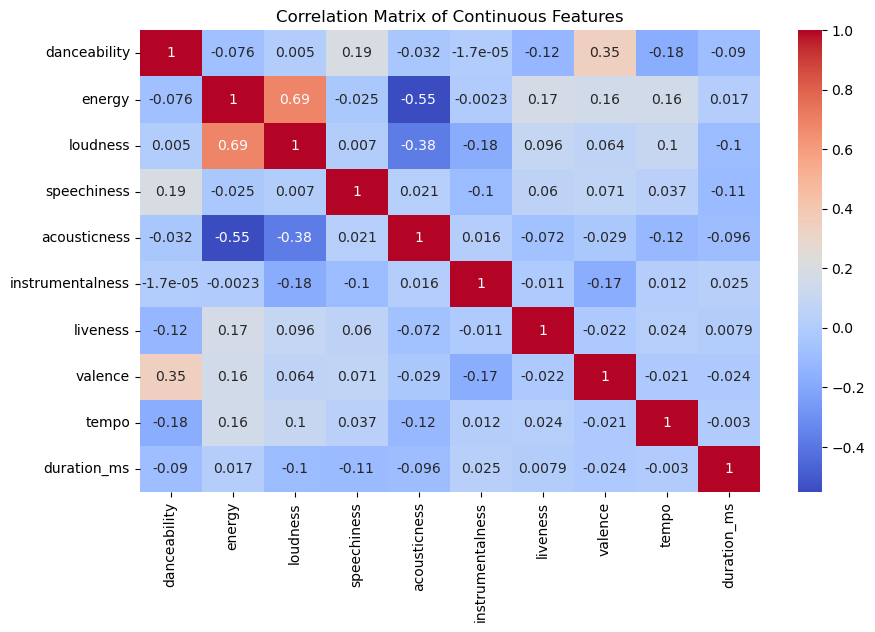

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

sns.heatmap(data=numeric_features_cont.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix of Continuous Features')
plt.show()

As we recall from this matrix and my previous report, none of the variables are highly correlated with each other besides loudness and energy because in energy's feature description, loudness is included. The next highest variables are danceability and energy, and energy and acousticness.

## Preprocess, Standardization BEFORE KMeans()

I will use scikit-learn for preprocessing by:

* Initializing the object based on assumptions
* Fit the object given the Spotify data set
* Predict and transform the data set using the fitted object.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
%whos

Variable                Type         Data/Info
----------------------------------------------
StandardScaler          type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ax                      Axes         Axes(0.125,0.11;0.62x0.77)
correlation             DataFrame                      danceab<...>332  0.023655  1.000000  
df                      DataFrame                         trac<...>[32828 rows x 23 columns]
df1                     DataFrame                         trac<...>[25187 rows x 23 columns]
df2                     DataFrame                         trac<...>[21293 rows x 23 columns]
fig                     Figure       Figure(1000x600)
np                      module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
numeric_features_cont   DataFrame           danceability  ener<...>[21293 rows x 10 columns]
pd                      module       <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt                     module       <module

In [ ]:
# initializing

cont_standardize = StandardScaler()

In [ ]:
type(cont_standardize)

sklearn.preprocessing._data.StandardScaler

In [ ]:
# check that these are the columns I will standardize

numeric_features_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21293 entries, 3 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21293 non-null  float64
 1   energy            21293 non-null  float64
 2   loudness          21293 non-null  float64
 3   speechiness       21293 non-null  float64
 4   acousticness      21293 non-null  float64
 5   instrumentalness  21293 non-null  float64
 6   liveness          21293 non-null  float64
 7   valence           21293 non-null  float64
 8   tempo             21293 non-null  float64
 9   duration_ms       21293 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.8 MB


In [ ]:
# fit using dataframe of just numeric columns

cont_standardize = cont_standardize.fit(numeric_features_cont)

In [ ]:
# transform the numeric columns

Xcontinuous = cont_standardize.transform(numeric_features_cont)

In [ ]:
type(Xcontinuous)

numpy.ndarray

In [ ]:
Xcontinuous.shape

(21293, 10)

In [ ]:
numeric_features_cont.shape

(21293, 10)

In [ ]:
# initialize, fit, and transform

StandardScaler().fit_transform(numeric_features_cont).shape

(21293, 10)

In [ ]:
# Convert the NumPy array back into a data frame to support visualization with Seaborn

pd.DataFrame(Xcontinuous, columns=numeric_features_cont.columns)

danceability    energy  loudness  speechiness  acousticness  \
0          0.435143  1.282264  1.022702    -0.062084     -0.685367   
1         -0.030913  0.761289  0.731274    -0.701007     -0.460428   
2         -1.408519  0.884820  0.693460    -0.445824      0.004710   
3          0.167846  1.244668  0.135379     0.701530     -0.174022   
4          0.613341  0.186606  0.730296    -0.600480     -0.636543   
...             ...       ...       ...          ...           ...   
21288     -1.552447  1.239297  1.662930    -0.143279     -0.476557   
21289     -0.908194  0.508858  0.799730    -0.642044     -0.803025   
21290     -0.860218  0.696839  0.657276    -0.583082     -0.339675   
21291     -0.195403  1.056687  1.158636     0.005578     -0.775954   
21292     -0.353039  1.035204  0.764198    -0.675875     -0.809900   

       instrumentalness  liveness   valence     tempo  duration_ms  
0             -0.395342  0.098910 -0.987913  0.035505    -0.902320  
1             -0.395382 -0.686041  0.924798  0.110019    -0.572163  
2             -0.395382 -0.083183 -1.521593 -0.307849    -0.594941  
3             -0.395361 -0.421356  1.040073  0.036538    -0.260484  
4             -0.395382  1.204475  0.762559  0.036575    -0.515011  
...                 ...       ...       ...       ...          ...  
21288         -0.395382 -0.793346 -1.273966  0.264728    -0.318694  
21289         -0.377333  1.210979 -0.462771  0.259970     2.141808  
21290         -0.395377 -0.252269 -0.309071  0.258051    -0.223794  
21291          0.141419  1.002872 -0.855560  0.258752     2.378554  
21292          1.045948  3.597699 -1.788860  0.257867     1.883426  

[21293 rows x 10 columns]

#### Let's see a comparison of how a feature may dominate the magnitude and scale in the raw data vs. in the standardized/ preprocessed variables.

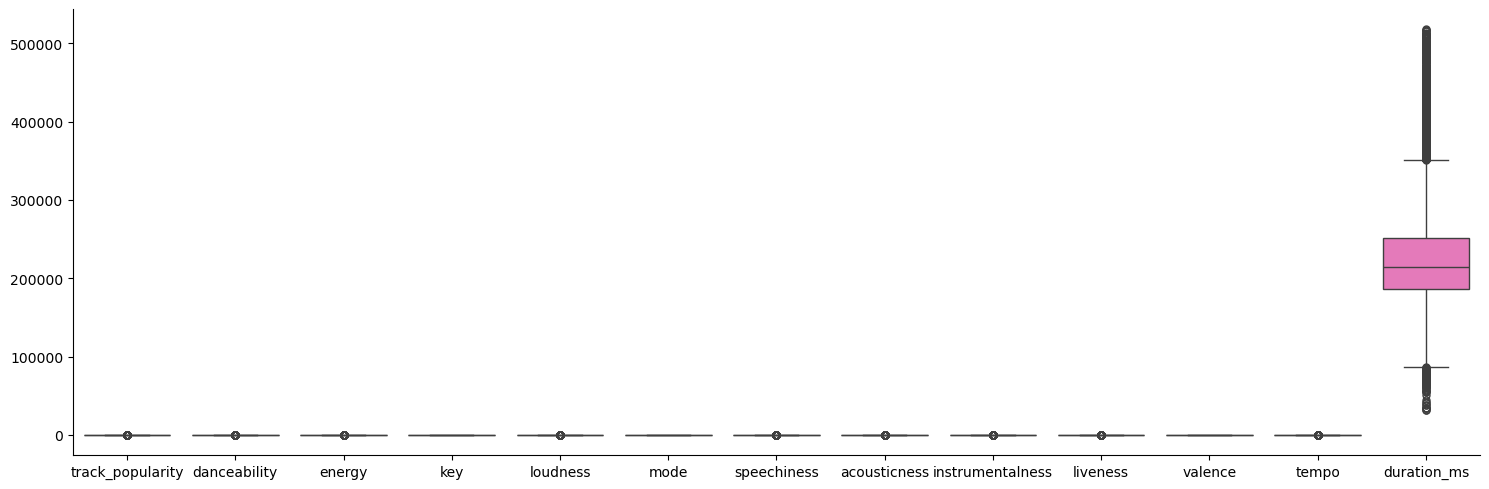

In [ ]:
# Data before preprocessing- duration_ms not scaled (ignore categorical variables)

sns.catplot(data=df2, kind='box', aspect=3)

plt.show()

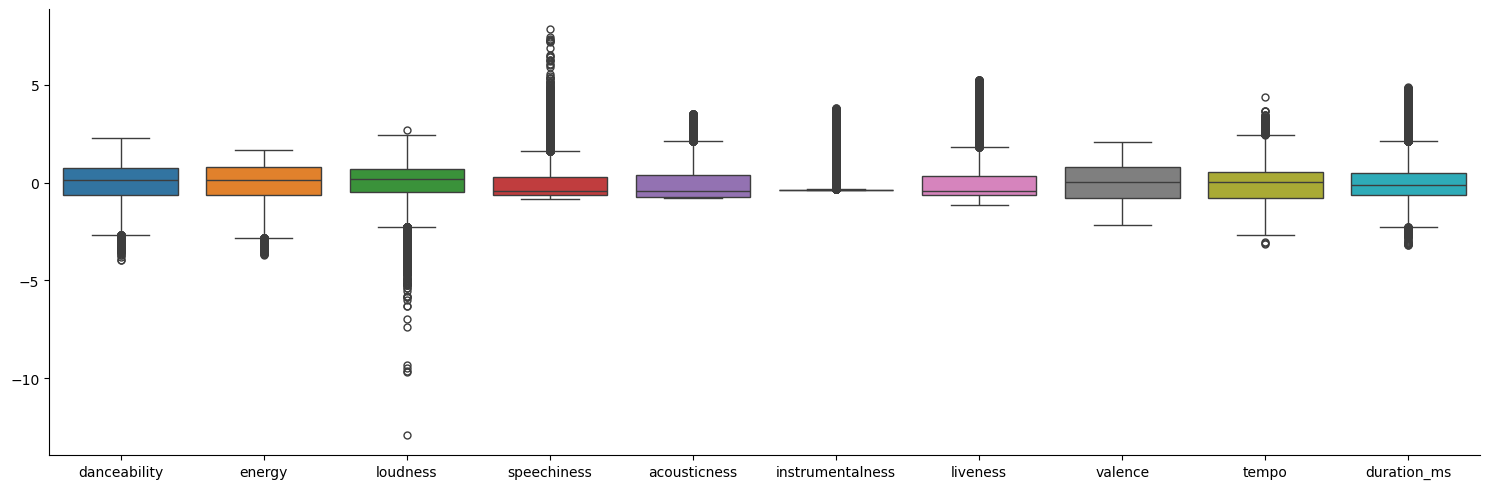

In [ ]:
# Data after preprocessing

sns.catplot(data=pd.DataFrame(Xcontinuous, columns=numeric_features_cont.columns), kind='box', aspect=3)

plt.show()

### * Execute PCA and return 2 newly created variables.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# initialize, fit, and transform

pca_cont_features = PCA(n_components=2).fit_transform(Xcontinuous)

In [ ]:
type(pca_cont_features)

numpy.ndarray

In [ ]:
pca_cont_features.shape

(21293, 2)

In [ ]:
Xcontinuous.shape

(21293, 10)

In [ ]:
# convert NumPy array pca to data frame to support visualizations

pca_cont_df = pd.DataFrame(pca_cont_features, columns=['pc01','pc02'])

In [ ]:
pca_cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    21293 non-null  float64
 1   pc02    21293 non-null  float64
dtypes: float64(2)
memory usage: 332.8 KB


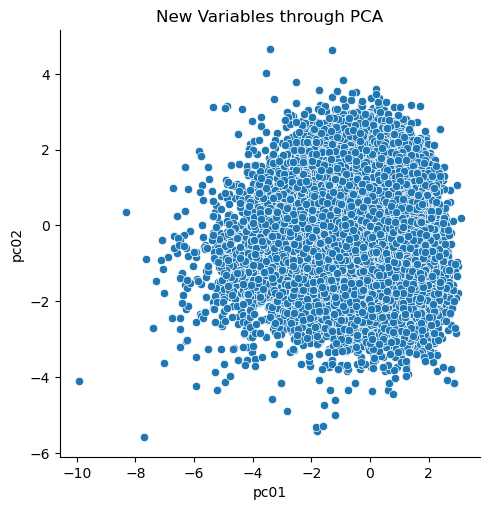

In [ ]:
# visualize the relationship between the newly created variables with a scatter plot

sns.relplot(data=pca_cont_df, x='pc01', y='pc02')

plt.title('New Variables through PCA')
plt.show()

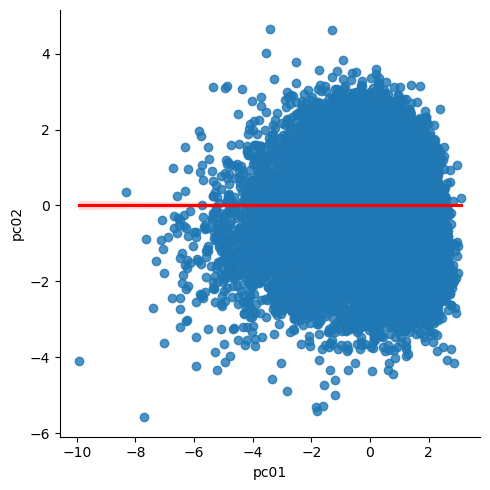

In [ ]:
sns.lmplot(data=pca_cont_df, x='pc01', y='pc02', line_kws={"color": "red"})

plt.show()

In [ ]:
# include groupings of categorical variables with PCA

pca_cont_df['playlist_genre']= df2.playlist_genre

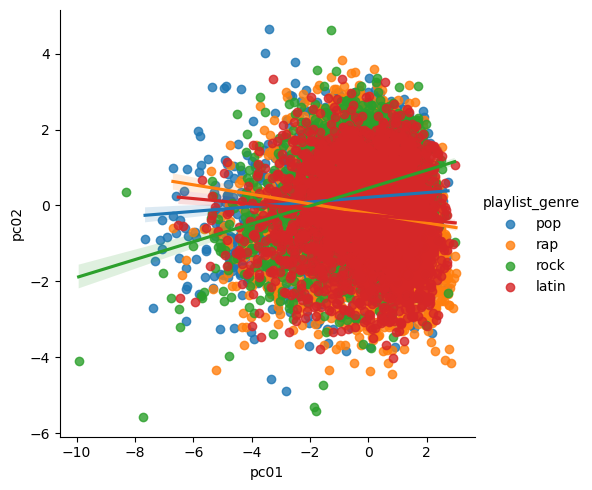

In [ ]:
sns.lmplot(data=pca_cont_df, x='pc01', y='pc02', hue='playlist_genre')

plt.show()

## Optimal number of clusters using the Elbow Method



In [ ]:
# calculate the total within sum of squares by minimizing inertia

tots_within = []

K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(Xcontinuous)

    tots_within.append(km.inertia_)

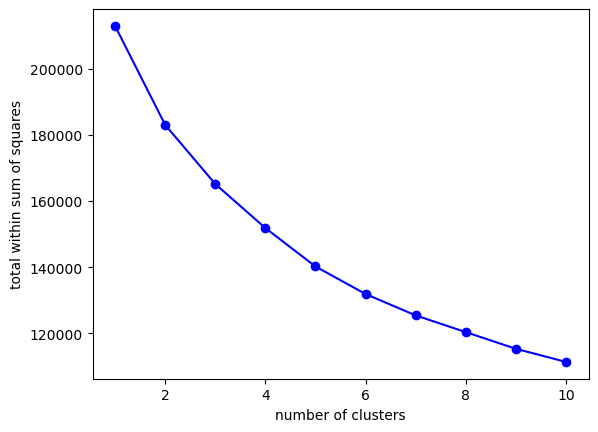

In [ ]:
# Visualize the elbow method to determine how many clusters are needed

fig, ax = plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In the elbow chart above, the optimal number of clusters is difficult to see since it's not a perfect "elbow." A drawback of the elbow method is it's subject to the human eye, and therefore... subjective. The optimal number of clusters appears to be 3 since this is where it begins to "bend".

### Use 3 clusters to create the KMeans object and visualize the 3 clusters

In [ ]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict(Xcontinuous)

In [ ]:
df_copy=df2.copy()

In [ ]:
# assign cluster labels to a copy of the cleaned data

df_copy['k3'] = pd.Series(clusters_3, index=df_copy.index).astype('category')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21293 entries, 3 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   track_id                  21293 non-null  object  
 1   track_name                21293 non-null  object  
 2   track_artist              21293 non-null  object  
 3   track_popularity          21293 non-null  int64   
 4   track_album_id            21293 non-null  object  
 5   track_album_name          21293 non-null  object  
 6   track_album_release_date  21293 non-null  object  
 7   playlist_name             21293 non-null  object  
 8   playlist_id               21293 non-null  object  
 9   playlist_genre            21293 non-null  object  
 10  playlist_subgenre         21293 non-null  object  
 11  danceability              21293 non-null  float64 
 12  energy                    21293 non-null  float64 
 13  key                       21293 non-null  int64   


In [ ]:
df_copy.k3.value_counts()

k3
2    9678
0    7575
1    4040
Name: count, dtype: int64

### Visualize Clusters against Categorical Variables

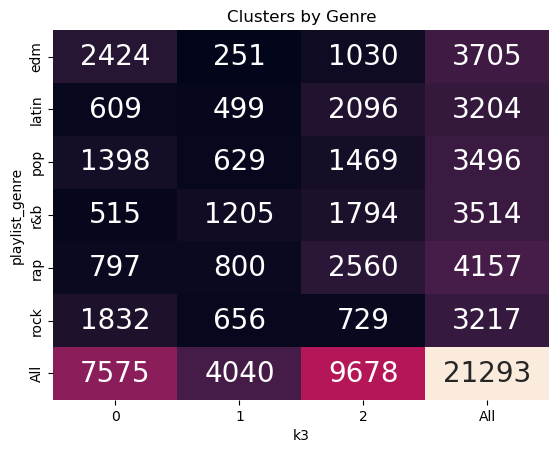

In [ ]:
# How clusters align with Genre

fig, ax=plt.subplots()

sns.heatmap(data=pd.crosstab(df_copy.playlist_genre, df_copy.k3, margins=True),
            annot=True, annot_kws={'fontsize':20}, fmt='g',
            cbar=False,
            ax=ax)

plt.title('Clusters by Genre')
plt.show()

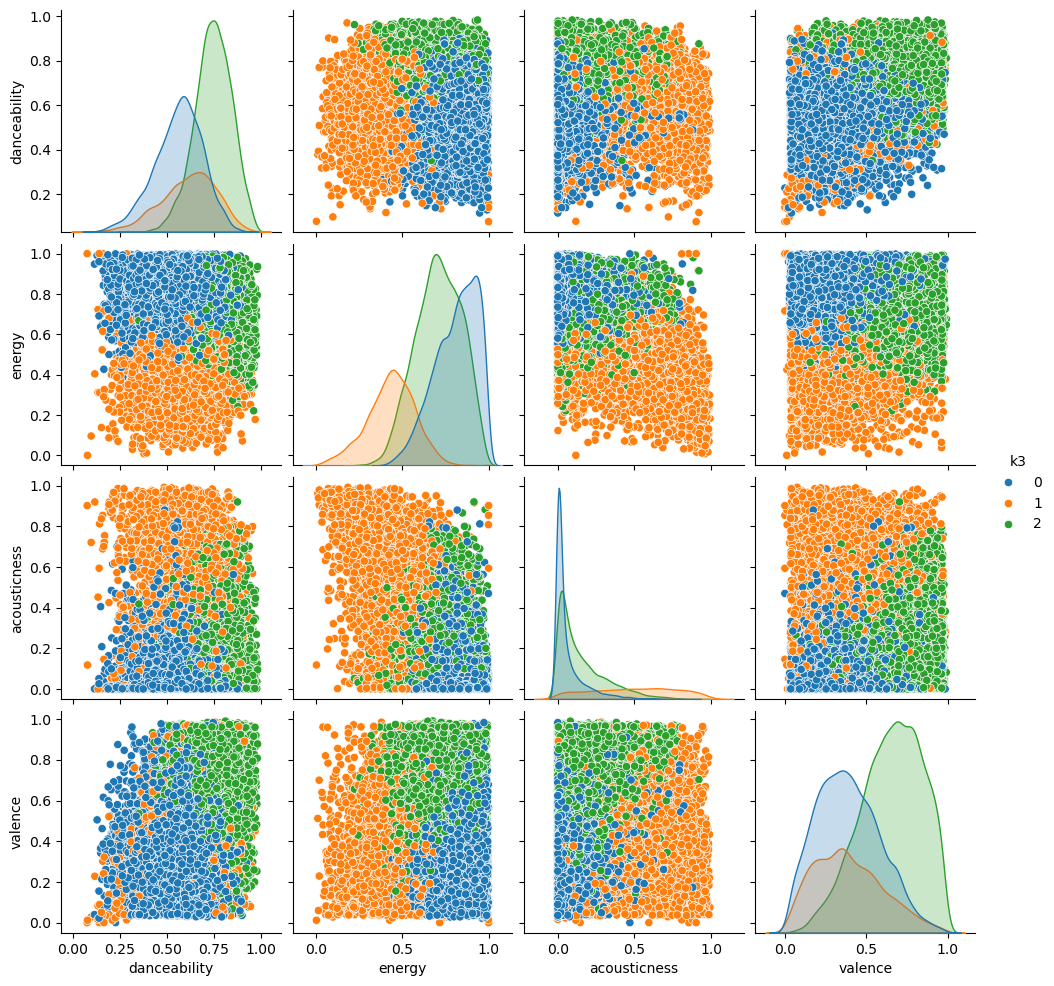

In [ ]:
sns.pairplot(df_copy, vars=['danceability', 'energy', 'acousticness', 'valence'], hue='k3')

plt.show()

In [ ]:
# Find the average for each cluster

df_copy.groupby('k3')[['energy', 'danceability', 'acousticness', 'valence']].mean()

/var/folders/0q/386dd4r905b_lww7fyqptx480000gn/T/ipykernel_70142/4269102419.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby('k3')[['energy', 'danceability', 'acousticness', 'valence']].mean()


energy  danceability  acousticness   valence
k3                                                
0   0.808586      0.560941      0.063907  0.387594
1   0.433142      0.614325      0.491515  0.390839
2   0.707169      0.744523      0.153851  0.652011

### First look interpretation

Valence and energy are decently separated clusters. Danceability and energy are also decently separated clusters. The rest are very mixed with a lot of overlap.

* In cluster 0 energy is the highest.
* Cluster 1 has lower valence and energy. The valence between cluster 0 and 1 almost the same.
* Cluster 2 has high energy and danceability.

### Visualize the Cluster's averages for variables in KMeans

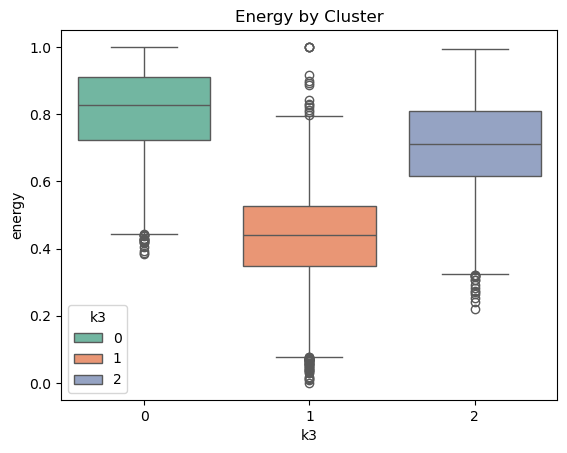

In [ ]:
# Energy

sns.boxplot(data=df_copy, x='k3', y='energy', hue='k3', palette = 'Set2')

plt.title('Energy by Cluster')
plt.show()

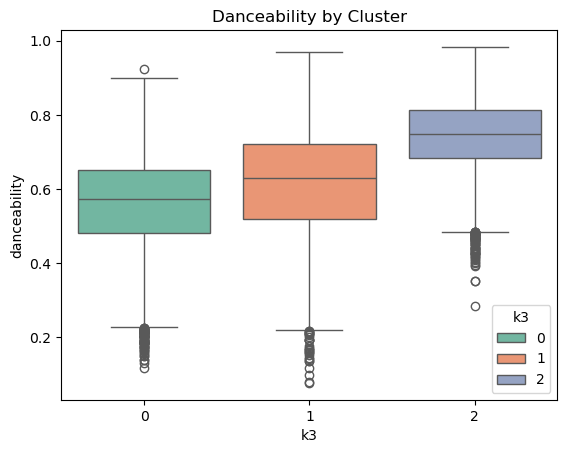

In [ ]:
# Danceability

sns.boxplot(data=df_copy, x='k3', y='danceability', hue='k3', palette='Set2')

plt.title('Danceability by Cluster')
plt.show()

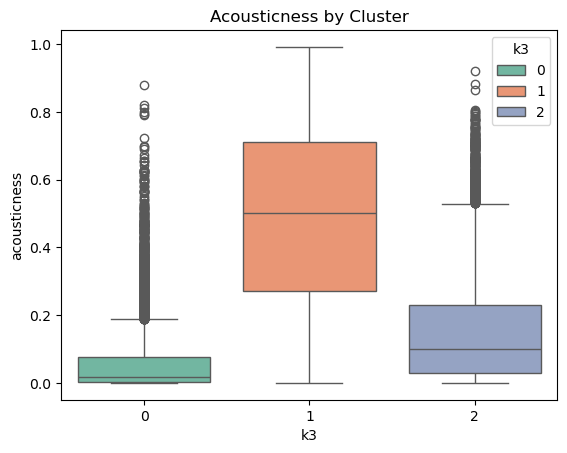

In [ ]:
# Acousticness

sns.boxplot(data=df_copy, x='k3', y='acousticness', hue='k3', palette='Set2')

plt.title('Acousticness by Cluster')
plt.show()

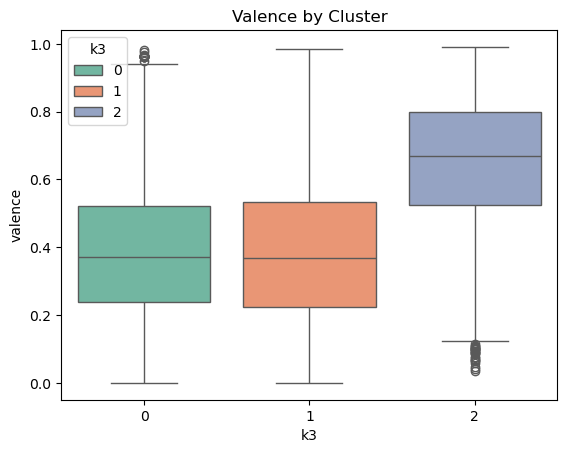

In [ ]:
# Valence

sns.boxplot(data=df_copy, x='k3', y='valence', hue='k3', palette='Set2')

plt.title('Valence by Cluster')
plt.show()

#### Confirming Notes from averages of the variables in clusters:

* Cluster 0 and 2 have higher `energy` than cluster 1
* Cluster 2 has the highest `danceability` followed by 1 then 0.. which is interesting that cluster 0 had high energy though!
* Clusters 0 and 2 have low `acousticness`, meaning they use electric amplification instruments. However, cluster 1 varies a lot on whether there is use of electric amplification instruments or not!


## Visualize Cluster results with PCA

In [ ]:
pca_cont_df.reset_index(drop=True)

pca_cont_df['k3']=df_copy['k3'].astype('category')

In [ ]:
pca_cont_df.reset_index(drop=True)

pc01      pc02 playlist_genre   k3
0      1.614176 -0.023223            NaN  NaN
1      1.149740  0.529432            NaN  NaN
2      0.751093 -1.523678            NaN  NaN
3      1.021689  1.085378            pop    0
4      1.146568  0.625497            pop    2
...         ...       ...            ...  ...
21288  1.759241 -1.442772          latin    0
21289  1.393345 -1.674884          latin    2
21290  0.985070 -0.776044          latin    2
21291  1.757023 -1.382011            NaN  NaN
21292  1.760475 -2.743479            NaN  NaN

[21293 rows x 4 columns]

In [ ]:
pca_cont_df['track_popularity']=df_copy['track_popularity']

In [ ]:
pca_cont_df.columns

Index(['pc01', 'pc02', 'playlist_genre', 'k3', 'track_popularity'], dtype='object')

In [ ]:
pca_cont_df.shape

(21293, 5)

In [ ]:
pca_cont_df.describe()

pc01          pc02  track_popularity
count  2.129300e+04  2.129300e+04      14039.000000
mean   3.203499e-17 -2.135666e-17          0.248878
std    1.483194e+00  1.241573e+00          0.432378
min   -9.929780e+00 -5.581513e+00          0.000000
25%   -7.720375e-01 -8.490896e-01          0.000000
50%    2.563034e-01  6.960506e-02          0.000000
75%    1.064095e+00  9.043557e-01          0.000000
max    3.103660e+00  4.639823e+00          1.000000

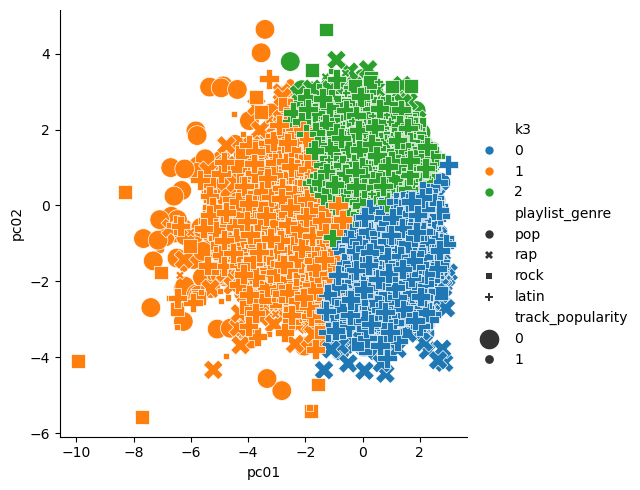

In [ ]:
sns.relplot(data=pca_cont_df, x='pc01', y='pc02', hue='k3', style='playlist_genre', size= 'track_popularity', sizes =(40,200))

plt.show()

The chart above displays the clusters, genres, and popularity of the tracks. The clusters are farily distinct, unlike my last project when I did not perform PCA.

* Cluster 0 is higher in pc01 and lower in pc02
* Cluster 1 is spread out, with a wider range between the value of pc02, but overall is between -6 to -2 pc01.
* Cluster 2 has very high pc01 and pc02!

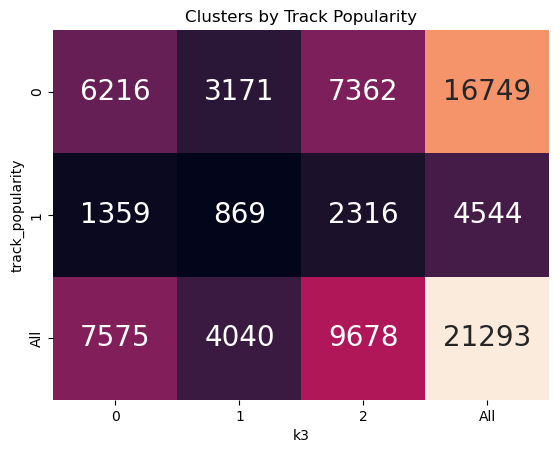

In [ ]:
# How clusters align with Track Popularity

fig, ax=plt.subplots()

sns.heatmap(data=pd.crosstab(pca_cont_df.track_popularity, pca_cont_df.k3, margins=True),
            annot=True, annot_kws={'fontsize':20}, fmt='g',
            cbar=False,
            ax=ax)

plt.title('Clusters by Track Popularity')
plt.show()

* Cluster 0 has 1,359 popular tracks (a score of 60-100). 21.9% of the songs in cluster 0 are popular.
* Cluster 1 only has 861 popular tracks. 27.4% of the songs in cluster 1 are popular
* Cluster 2 has 2,136 popular tracks, which is 31.5% popularity of the cluster!

`Clearly, having a higher PC01 and PC02 helps make the track a bit more popular!`

## Model Fitting and Interpretation

In [ ]:
cat_input_features = ['playlist_genre', 'playlist_subgenre', 'key', 'mode']

### Fit Logistic Regression Models

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
df2.shape

(21293, 23)

In [ ]:
df2.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [ ]:
df2.nunique()

track_id                    21293
track_name                  18562
track_artist                 9331
track_popularity                2
track_album_id              17482
track_album_name            15858
track_album_release_date     3918
playlist_name                 440
playlist_id                   462
playlist_genre                  6
playlist_subgenre              24
danceability                  809
energy                        941
key                            12
loudness                     9255
mode                            2
speechiness                  1252
acousticness                 3519
instrumentalness             4401
liveness                     1569
valence                      1291
tempo                       14374
duration_ms                 16084
dtype: int64

In [ ]:
df2.track_popularity.value_counts()

track_popularity
0    16749
1     4544
Name: count, dtype: int64

### Models

In [ ]:
# intercept only model

intercept_model= smf.logit('track_popularity ~ 1', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.518431
         Iterations 5


In [ ]:
intercept_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21292
Method:                           MLE   Df Model:                            0
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:               1.543e-10
Time:                        19:37:53   Log-Likelihood:                -11039.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3045      0.017    -77.992      0.000      -1.337      -1.272
==============================================================================
"""

* 1 coefficient was estimated and  significant since the p value is 0.00
* The intercept is negative and the magnitude is -1.3045

In [ ]:
# continuous inputs only model

cont_model= smf.logit('track_popularity ~ danceability + energy + loudness + speechiness + acousticness + instrumentalness + liveness + tempo + duration_ms', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.499381
         Iterations 7


In [ ]:
cont_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21283
Method:                           MLE   Df Model:                            9
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                 0.03675
Time:                        18:26:43   Log-Likelihood:                -10633.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                8.032e-169
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6716      0.212      3.166      0.002       0.256       1.087
danceability         0.2186      0.125      1.752      0.080      -0.026       0.463
energy              -1.8768      0.149    -12.601      0.000      -2.169      -1.585
loudness             0.1222      0.009     13.820      0.000       0.105       0.140
speechiness         -0.7467      0.174     -4.296      0.000      -1.087      -0.406
acousticness         0.2898      0.088      3.279      0.001       0.117       0.463
instrumentalness    -1.7792      0.116    -15.397      0.000      -2.006      -1.553
liveness            -0.3839      0.120     -3.187      0.001      -0.620      -0.148
tempo                0.0032      0.001      5.093      0.000       0.002       0.004
duration_ms      -8.541e-07   3.17e-07     -2.691      0.007   -1.48e-06   -2.32e-07
====================================================================================
"""

* Number of coefficients estimated: 10
* The model overall is statistically significant since it has a p value of less than 0.05.
* The CI does not include 0 so this also tells us the model is statistically significant.
* Danceability is not a significant feature since the p value is 0.08.
* Significant and Positive: Intercept, loudness, acousticness, tempo
* Significant and Negative: energy, speechiness, liveness, duration_ms
* Strongest magnitude: energy and instrumentalness

In [ ]:
# Had to get help from the internet with this code because it kept producing an error since subgenre has some with less than 50 tracks

# Count songs per subgenre
subgenre_counts = df2['playlist_subgenre'].value_counts()

# Keep subgenres with at least 50 songs
valid_subgenres = subgenre_counts[subgenre_counts >= 50].index

# Filter dataframe
df_filtered = df2[df2['playlist_subgenre'].isin(valid_subgenres)]

# categorical only model
cat_model = smf.logit('track_popularity ~ C(playlist_genre) + C(key) + C(playlist_subgenre) + C(mode)',
    data=df_filtered).fit()

Optimization terminated successfully.
         Current function value: 0.472052
         Iterations 7


In [ ]:
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21252
Method:                           MLE   Df Model:                           40
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                 0.08946
Time:                        18:48:19   Log-Likelihood:                -10051.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -1.7943   7.18e+05   -2.5e-06      1.000   -1.41e+06    1.41e+06
C(playlist_genre)[T.latin]                            0.4916        nan        nan        nan         nan         nan
C(playlist_genre)[T.pop]                              0.6913   1.93e+06   3.58e-07      1.000   -3.79e+06    3.79e+06
C(playlist_genre)[T.r&b]                              0.1843        nan        nan        nan         nan         nan
C(playlist_genre)[T.rap]                              0.3122        nan        nan        nan         nan         nan
C(playlist_genre)[T.rock]                             0.0827   7.18e+05   1.15e-07      1.000   -1.41e+06    1.41e+06
C(key)[T.1]                                           0.0463      0.073      0.636      0.525      -0.096       0.189
C(key)[T.2]                                          -0.0355      0.079     -0.451      0.652      -0.190       0.119
C(key)[T.3]                                          -0.0427      0.117     -0.364      0.716      -0.273       0.188
C(key)[T.4]                                           0.0074      0.085      0.087      0.931      -0.160       0.175
C(key)[T.5]                                           0.1104      0.080      1.374      0.170      -0.047       0.268
C(key)[T.6]                                          -0.0530      0.084     -0.633      0.527      -0.217       0.111
C(key)[T.7]                                          -0.0778      0.077     -1.016      0.309      -0.228       0.072
C(key)[T.8]                                           0.0069      0.083      0.083      0.934      -0.156       0.170
C(key)[T.9]                                          -0.0322      0.078     -0.415      0.678      -0.184       0.120
C(key)[T.10]                                          0.0055      0.086      0.064      0.949      -0.163       0.174
C(key)[T.11]                                         -0.0507      0.081     -0.629      0.529      -0.209       0.107
C(playlist_subgenre)[T.big room]                     -1.4362   7.18e+05     -2e-06      1.000   -1.41e+06    1.41e+06
C(playlist_subgenre)[T.classic rock]                  0.7025      0.136      5.163      0.000       0.436       0.969
C(playlist_subgenre)[T.dance pop]                     0.0157   1.84e+06   8.57e-09      1.000    -3.6e+06     3.6e+06
C(playlist_subgenre)[T.electro house]                -1.2074   7.18e+05  -1.68e-06      1.000   -1.41e+06    1.41e+06
C(playlist_subgenre)[T.electropop]                    0.0461   1.84e+06   2.51e-08      1.000    -3.6e+06     3.6e+06
C(playlist_subgenre)[T.gangster rap]                 -0.2287        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.hard rock]                     0.2657      0.135      1.962      0.050       0.000       0.531
C(playlist_subgenre)[T.hip hop]                       0

* There are 41 coefficiencts
* 3 coefficients are statistically significant: `C(playlist_subgenre)[T.classic rock]`, `C(playlist_subgenre)[T.hard rock]`, and `C(playlist_subgenre)[T.permanent wave]`
* The 3 coefficients are positive
* permanent wave and classic rock have the highest magnitude

In [ ]:
# all inputs model

all_features = '+'.join(numeric_features_names + ['C(playlist_genre)','C(key)','C(mode)','C(playlist_subgenre)'])
all_inputs_model = smf.logit(f'track_popularity ~ {all_features}', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.459381
         Iterations 7


In [ ]:
all_inputs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21242
Method:                           MLE   Df Model:                           50
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                  0.1139
Time:                        18:53:10   Log-Likelihood:                -9781.6
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -0.6263   9.02e+05  -6.94e-07      1.000   -1.77e+06    1.77e+06
C(playlist_genre)[T.latin]                            0.4404   7.43e+06   5.93e-08      1.000   -1.46e+07    1.46e+07
C(playlist_genre)[T.pop]                              0.7071        nan        nan        nan         nan         nan
C(playlist_genre)[T.r&b]                              0.1518   3.36e+06   4.52e-08      1.000   -6.58e+06    6.58e+06
C(playlist_genre)[T.rap]                              0.3175   1.97e+06   1.61e-07      1.000   -3.85e+06    3.85e+06
C(playlist_genre)[T.rock]                             0.3667   9.02e+05   4.06e-07      1.000   -1.77e+06    1.77e+06
C(key)[T.1]                                           0.0178      0.074      0.241      0.810      -0.127       0.163
C(key)[T.2]                                          -0.0288      0.080     -0.361      0.718      -0.185       0.128
C(key)[T.3]                                          -0.0545      0.119     -0.459      0.646      -0.288       0.178
C(key)[T.4]                                           0.0062      0.087      0.071      0.943      -0.164       0.176
C(key)[T.5]                                           0.1125      0.081      1.381      0.167      -0.047       0.272
C(key)[T.6]                                          -0.0461      0.085     -0.542      0.588      -0.213       0.121
C(key)[T.7]                                          -0.0830      0.078     -1.069      0.285      -0.235       0.069
C(key)[T.8]                                          -0.0011      0.084     -0.013      0.990      -0.166       0.164
C(key)[T.9]                                          -0.0199      0.079     -0.254      0.800      -0.174       0.134
C(key)[T.10]                                          0.0339      0.087      0.388      0.698      -0.137       0.205
C(key)[T.11]                                         -0.0346      0.082     -0.424      0.671      -0.195       0.125
C(mode)[T.1]                                          0.0752      0.038      1.972      0.049       0.000       0.150
C(playlist_subgenre)[T.big room]                     -1.1250   9.02e+05  -1.25e-06      1.000   -1.77e+06    1.77e+06
C(playlist_subgenre)[T.classic rock]                  0.7486      0.138      5.420      0.000       0.478       1.019
C(playlist_subgenre)[T.dance pop]                     0.0083        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.electro house]                -0.8344   9.02e+05  -9.25e-07      1.000   -1.77e+06    1.77e+06
C(playlist_subgenre)[T.electropop]                    0.1744        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.gangster rap]                 -0.2842   1.94e+06  -1.47e-07      1.000    -3.8e+06     3.8e+06
C(playlist_subgenre)[T.hard rock]                     0

* There are 53 coefficients estimated.
* In this model, 9 coefficients are statistically significant:
`C(mode)[T.1]`,
`C(playlist_subgenre)[T.classic rock] `
`C(playlist_subgenre)[T.hard rock] `
`C(playlist_subgenre)[T.permanent wave]`
`danceability`
`energy `
`loudness `
`instrumentalness`
`tempo`
* The statistically significant coefficients are all positive besides energy and instrumentalness, they are negative.
* The two with the largest magnitude is energy and permanent wave.

A note about this model: I realize that some coefficients have nan and large standard errors, so this means I can't be reliable on them.

In [ ]:
numeric_features_names = ['danceability', 'energy', 'loudness', 'speechiness',
                         'acousticness', 'instrumentalness', 'liveness',
                         'valence', 'tempo', 'duration_ms']

In [ ]:
# continuous pariwise interactions most correlated to track popularity

cont_pair_model_interactions = smf.logit('track_popularity ~ danceability * energy * acousticness * loudness', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.505351
         Iterations 6


In [ ]:
cont_pair_model_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21277
Method:                           MLE   Df Model:                           15
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                 0.02523
Time:                        19:02:01   Log-Likelihood:                -10760.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                4.646e-109
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -2.1779      0.871     -2.500      0.012      -3.885      -0.470
danceability                                  7.3051      1.341      5.446      0.000       4.676       9.934
energy                                        0.2718      1.072      0.253      0.800      -1.830       2.373
danceability:energy                          -6.6175      1.702     -3.887      0.000      -9.954      -3.281
acousticness                                  3.3813      1.975      1.712      0.087      -0.489       7.252
danceability:acousticness                    -9.8888      3.287     -3.008      0.003     -16.331      -3.446
energy:acousticness                          -5.0725      3.105     -1.634      0.102     -11.157       1.012
danceability:energy:acousticness             14.8418      5.032      2.950      0.003       4.980      24.704
loudness                                     -0.0508      0.081     -0.625      0.532      -0.210       0.108
danceability:loudness                         0.5366      0.133      4.030      0.000       0.276       0.798
energy:loudness                              -0.1150      0.125     -0.922      0.357      -0.359       0.129
danceability:energy:loudness                 -0.1164      0.206     -0.565      0.572      -0.520       0.287
acousticness:loudness                         0.1502      0.151      0.996      0.319      -0.145       0.446
danceability:acousticness:loudness           -0.6366      0.263     -2.421      0.015      -1.152      -0.121
energy:acousticness:loudness                 -0.0713      0.287     -0.249      0.804      -0.634       0.491
danceability:energy:acousticness:loudness     0.6117      0.483      1.265      0.206      -0.336       1.559
=============================================================================================================
"""

* There are 16 coefficients estimated
* There are 7 statistically significant coefficients with a p value below 0.05:
`intercept`
`danceability`
`danceability:energy`
`danceability:acousticness`
`danceability:energy:acousticness`
`danceability:loudness`
`danceability:acousticness:loudness`
* Positive coefficients: `danceability`, `danceability:energy:acousticness`,`danceability:loudness`
* Negative coefficients: `intercept`, `danceability:energy`, `danceability:acousticness`, `danceability:acousticness:loudness`
* Highest magnitudes: `danceability:energy:acousticness`, `danceability:acousticness`

Takeaways: the main effect danceability depends on energy and acousticness, but energy, acousticness, and loudness alone are not significant!

In [ ]:
# interact categorical variables continuous variables

# interactions
interactions = [f'C({cat})*{cont}'
                for cat in cat_input_features
                for cont in numeric_features_names]

# join
join_variables= 'track_popularity ~' + '+'.join(interactions)

#fit model
model_cat_cont_both = smf.logit(join_variables, data=df2).fit()

         Current function value: 0.440366
         Iterations: 35


/opt/anaconda3/envs/cmpinf2100/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_cat_cont_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    20890
Method:                           MLE   Df Model:                          402
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                  0.1506
Time:                        10:53:26   Log-Likelihood:                -9376.7
converged:                      False   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================================
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              0.2940        nan        nan        nan         nan         nan
C(playlist_genre)[T.latin]                                             1.8744   1.58e+06   1.19e-06      1.000    -3.1e+06     3.1e+06
C(playlist_genre)[T.pop]                                               1.2242        nan        nan        nan         nan         nan
C(playlist_genre)[T.r&b]                                               1.7627        nan        nan        nan         nan         nan
C(playlist_genre)[T.rap]                                              -0.7308   7.48e+05  -9.77e-07      1.000   -1.47e+06    1.47e+06
C(playlist_genre)[T.rock]                                             -1.8880        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.big room]                                      -0.1756        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.classic rock]                                   2.3867      1.616      1.477      0.140      -0.780       5.553
C(playlist_subgenre)[T.dance pop]                                      0.0928        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.electro house]                                  0.0416        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.electropop]                                     1.1972        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.gangster rap]                                  -1.8624        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.hard rock]                                      2.0253      1.815      1.116      0.264      -1.531       5.582
C(playlist_subgenre)[T.hip hop]                                        0.9913        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.hip pop]                                        1.9501        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.indie poptimism]                                0.3484        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.latin hip hop]                                  3.8005        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.latin pop]                                     -0.4180        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.neo soul]                                      -0.6772        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.new jack swing]                                 0.7525        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.permanent wave]                                 4.5717      1.494      3.059      0.002       1.643       7.501
C

In [ ]:
(model_cat_cont_both.pvalues < 0.05).sum()

np.int64(19)

In [ ]:
# statitically significant coefficients:

model_cat_cont_both.pvalues[model_cat_cont_both.pvalues < 0.05].index

Index(['C(playlist_subgenre)[T.permanent wave]', 'C(key)[T.5]:energy',
       'C(key)[T.9]:energy', 'C(key)[T.10]:energy', 'C(key)[T.4]:loudness',
       'C(key)[T.5]:loudness', 'C(key)[T.6]:loudness', 'C(key)[T.9]:loudness',
       'C(key)[T.11]:loudness', 'C(key)[T.2]:instrumentalness',
       'C(key)[T.4]:instrumentalness', 'C(key)[T.10]:liveness',
       'C(key)[T.3]:valence', 'C(key)[T.5]:valence', 'C(key)[T.6]:valence',
       'C(key)[T.8]:valence', 'C(key)[T.11]:valence', 'C(mode)[T.1]:valence',
       'C(key)[T.3]:tempo'],
      dtype='object')

In [ ]:
# statistically significant coefficients that are positive

model_cat_cont_both.params[(model_cat_cont_both.params > 0) & (model_cat_cont_both.pvalues < 0.05)]

C(playlist_subgenre)[T.classic rock]                 2.588591
C(playlist_subgenre)[T.dance pop]                    3.527030
C(playlist_subgenre)[T.electropop]                   4.234750
C(playlist_subgenre)[T.hip hop]                      2.764856
C(playlist_subgenre)[T.hip pop]                      6.450251
C(playlist_subgenre)[T.indie poptimism]              3.246707
C(playlist_subgenre)[T.latin hip hop]                7.278651
C(playlist_subgenre)[T.latin pop]                    4.365876
C(playlist_subgenre)[T.neo soul]                     3.106076
C(playlist_subgenre)[T.permanent wave]               4.234506
C(playlist_subgenre)[T.post-teen pop]                4.768431
C(playlist_subgenre)[T.reggaeton]                    5.998853
C(playlist_subgenre)[T.southern hip hop]             3.165251
C(playlist_subgenre)[T.tropical]                     3.683694
C(playlist_subgenre)[T.urban contemporary]           3.154734
C(playlist_subgenre)[T.gangster rap]:danceability    3.073349
C(playli

In [ ]:
# statistically significant coefficients that are negative

model_cat_cont_both.params[(model_cat_cont_both.params < 0) & (model_cat_cont_both.pvalues < 0.05)]

C(key)[T.4]:loudness           -0.093640
C(key)[T.5]:loudness           -0.112361
C(key)[T.6]:loudness           -0.092253
C(key)[T.9]:loudness           -0.092936
C(key)[T.11]:loudness          -0.087934
C(key)[T.2]:instrumentalness   -1.311885
C(key)[T.4]:instrumentalness   -1.283601
C(key)[T.10]:liveness          -2.135574
C(mode)[T.1]:valence           -0.450376
dtype: float64

In [ ]:
# highest magnitudes-
#C(key)[T.8]:duration_ms      -2.485391e-06
#C(key)[T.9]:duration_ms      -1.980612e-06
#Intercept                     2.939582e-01

model_cat_cont_both.params

Intercept                     2.939582e-01
C(playlist_genre)[T.latin]    1.874450e+00
C(playlist_genre)[T.pop]      1.224177e+00
C(playlist_genre)[T.r&b]      1.762705e+00
C(playlist_genre)[T.rap]     -7.307767e-01
                                  ...     
C(key)[T.8]:duration_ms      -2.485391e-06
C(key)[T.9]:duration_ms      -1.980612e-06
C(key)[T.10]:duration_ms      2.720721e-07
C(key)[T.11]:duration_ms     -1.143280e-06
C(mode)[T.1]:duration_ms      1.424830e-06
Length: 451, dtype: float64

In [ ]:
# sin transformation

model_sin = smf.logit('track_popularity ~ np.sin(tempo) + danceability + energy + acousticness + loudness', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.507864
         Iterations 6


In [ ]:
model_sin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21287
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                 0.02038
Time:                        19:22:21   Log-Likelihood:                -10814.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                 4.824e-95
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2260      0.175      6.994      0.000       0.882       1.570
np.sin(tempo)    -0.0714      0.024     -2.992      0.003      -0.118      -0.025
danceability      0.0458      0.117      0.391      0.696      -0.184       0.275
energy           -2.2457      0.144    -15.610      0.000      -2.528      -1.964
acousticness      0.2537      0.087      2.928      0.003       0.084       0.424
loudness          0.1580      0.009     18.456      0.000       0.141       0.175
=================================================================================
"""

In [ ]:
# statistically significant coefficients number

(model_sin.pvalues < 0.05).sum()

np.int64(5)

In [ ]:
# which coefficients are statistically significant?

(model_cat_cont_both.pvalues < 0.05)

Intercept                                               True
C(playlist_subgenre)[T.big room]                       False
C(playlist_subgenre)[T.classic rock]                    True
C(playlist_subgenre)[T.dance pop]                       True
C(playlist_subgenre)[T.electro house]                  False
                                                       ...  
C(playlist_subgenre)[T.reggaeton]:loudness              True
C(playlist_subgenre)[T.southern hip hop]:loudness       True
C(playlist_subgenre)[T.trap]:loudness                  False
C(playlist_subgenre)[T.tropical]:loudness               True
C(playlist_subgenre)[T.urban contemporary]:loudness    False
Length: 120, dtype: bool

In [ ]:
# statistically significant coefficients that are positive

model_sin.params[(model_sin.params > 0) & (model_sin.pvalues < 0.05)]

Intercept       1.226044
acousticness    0.253721
loudness        0.157987
dtype: float64

In [ ]:
# statistically significant coefficients that are negative

model_sin.params[(model_sin.params < 0) & (model_sin.pvalues < 0.05)]

np.sin(tempo)   -0.071435
energy          -2.245664
dtype: float64

* The top 2 magnitudes are energy and intercept

In [ ]:
# polynomial for continuous features

poly_model = smf.logit('track_popularity ~ I(danceability**2) + energy + acousticness', data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.516762
         Iterations 5


In [ ]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21289
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:                0.003220
Time:                        19:27:54   Log-Likelihood:                -11003.
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                 2.485e-15
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.1380      0.100    -11.403      0.000      -1.334      -0.942
I(danceability ** 2)     0.2251      0.092      2.436      0.015       0.044       0.406
energy                  -0.4670      0.108     -4.343      0.000      -0.678      -0.256
acousticness             0.2664      0.085      3.119      0.002       0.099       0.434
========================================================================================
"""

In [ ]:
# statistically significant coefficients number

(poly_model.pvalues < 0.05).sum()

np.int64(4)

In [ ]:
# which coefficients are statistically significant?

(poly_model.pvalues < 0.05)

Intercept               True
I(danceability ** 2)    True
energy                  True
acousticness            True
dtype: bool

In [ ]:
# statistically significant coefficients that are positive

poly_model.params[(poly_model.params > 0) & (poly_model.pvalues < 0.05)]

I(danceability ** 2)    0.225127
acousticness            0.266397
dtype: float64

In [ ]:
# statistically significant coefficients that are negative

poly_model.params[(poly_model.params < 0) & (poly_model.pvalues < 0.05)]

Intercept   -1.137973
energy      -0.467033
dtype: float64

* intercept and energy have the top 2 magnitudes

In [ ]:
# put all models together

models={'Intercept-Only': intercept_model,
    'Categorical-Only': cat_model,
    'Continuous-Only': cont_model,
    'All Inputs': all_inputs_model,
    'Continuous + Interactions': cont_pair_model_interactions,
    'Categorical x Continuous': model_cat_cont_both,
    'Polynomial Term': poly_model,
    'Sine Transformation': model_sin}

In [ ]:
# loop through all models

for name, model in models.items():
    print(f"\n--- {name} ---")

    # predicted probabilities
    y_prob = model.predict(df2)

    # predicted classes at threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)

    # confusion matrix
    cm = confusion_matrix(df2['track_popularity'], y_pred)
    print("Confusion Matrix:\n", cm)

    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    accuracy = (TP + TN) / cm.sum()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan
    specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan
    fpr = FP / (FP + TN) if (FP + TN) > 0 else np.nan

    print("Accuracy:", accuracy)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("FPR:", fpr)


--- Intercept-Only ---
Confusion Matrix:
 [[16749     0]
 [ 4544     0]]
Accuracy: 0.7865965340722303
Sensitivity: 0.0
Specificity: 1.0
FPR: 0.0

--- Categorical-Only ---
Confusion Matrix:
 [[16730    19]
 [ 4534    10]]
Accuracy: 0.7861738599539755
Sensitivity: 0.0022007042253521128
Specificity: 0.9988656039166517
FPR: 0.0011343960833482597

--- Continuous-Only ---
Confusion Matrix:
 [[16745     4]
 [ 4544     0]]
Accuracy: 0.7864086789085615
Sensitivity: 0.0
Specificity: 0.9997611797719267
FPR: 0.00023882022807331782

--- All Inputs ---
Confusion Matrix:
 [[16466   283]
 [ 4187   357]]
Accuracy: 0.7900718546001033
Sensitivity: 0.07856514084507042
Specificity: 0.9831034688638127
FPR: 0.016896531136187234

--- Continuous + Interactions ---
Confusion Matrix:
 [[16738    11]
 [ 4535     9]]
Accuracy: 0.7865026064903959
Sensitivity: 0.0019806338028169014
Specificity: 0.9993432443727984
FPR: 0.0006567556272016239

--- Categorical x Continuous ---
Confusion Matrix:
 [[16187   562]
 [ 3777 

In [ ]:
df2.loc[:,'pred_class'] = (y_prob >= 0.5).astype(int)
df2.loc[:,'pred_high_threshold']= (y_prob >= 0.3).astype(int)

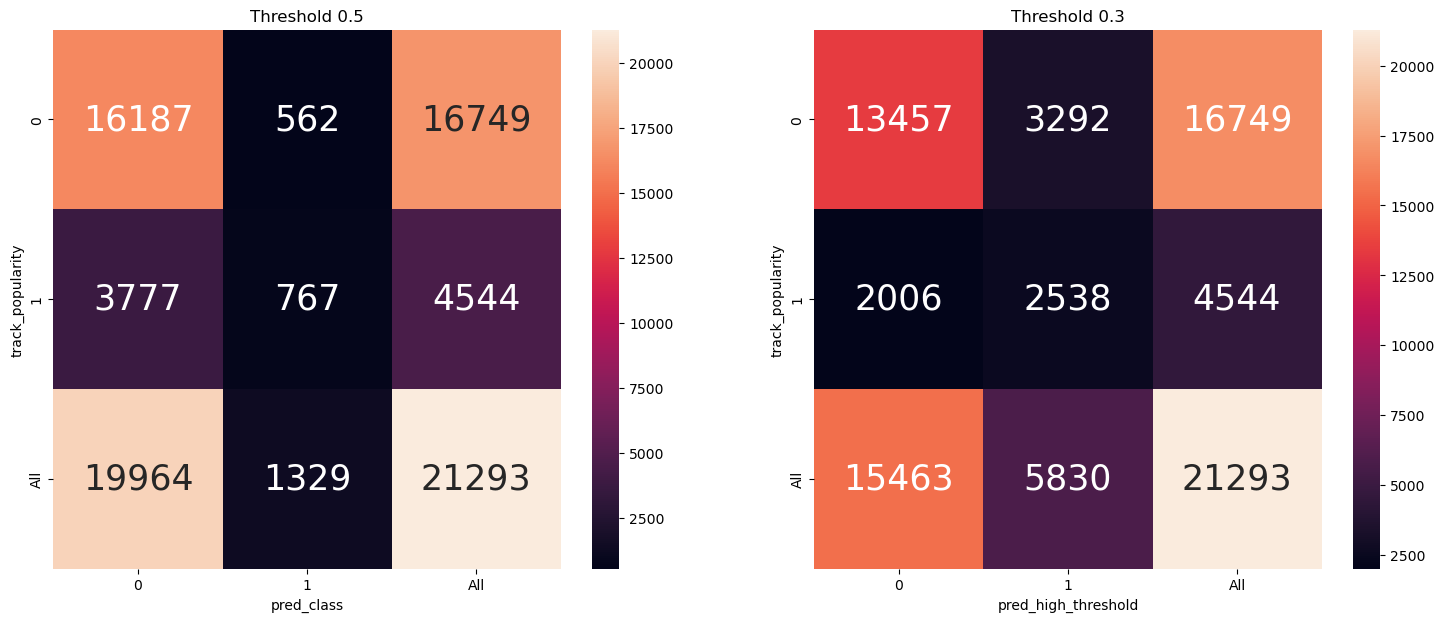

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax = ax.ravel()

sns.heatmap(pd.crosstab(df2.track_popularity, df2.pred_class, margins=True), annot=True, annot_kws={'size': 25}, fmt='3d', ax=ax[0])
ax[0].set_title('Threshold 0.5')

sns.heatmap(pd.crosstab(df2.track_popularity, df2.pred_high_threshold, margins=True), annot=True, annot_kws={'size': 25}, fmt='3d', ax=ax[1])
ax[1].set_title('Threshold 0.3')

plt.show()

In [ ]:
# since the goal is to detect popular songs, I need to lower the threshold below 0.5 to increase sensitivity.
# I know 0.3 isn't a "commonly accepted threshold" and this increases false positives, but it did increase predicting popular tracks.

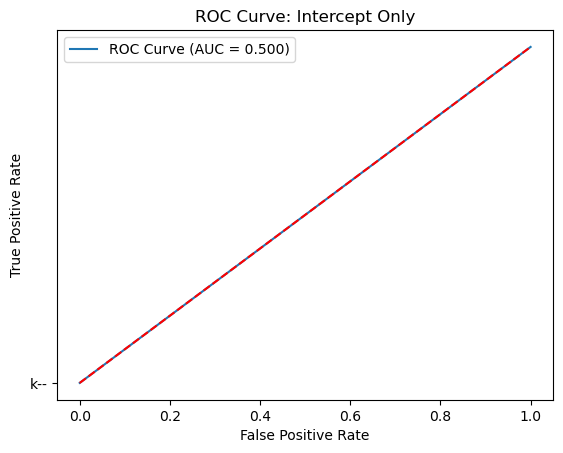

In [ ]:
# ROC curve & AUC

y_prob = models['Intercept-Only'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Intercept Only')
plt.legend()
plt.show()

#### An ROC/AUC of 0.5 is expected for an intercept model. It doesn't tell me anything about the data. Once I start to add other features the ROC curve should rise above the diagonal line.

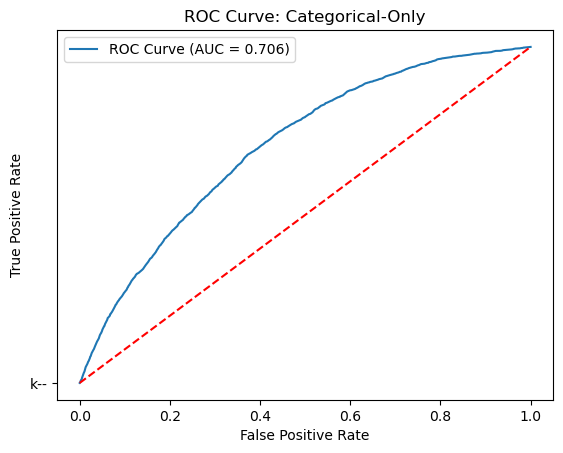

In [ ]:
y_prob = models['Categorical-Only'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Categorical-Only')
plt.legend()
plt.show()

 The categorical only model is better performing than random guessing since it is above the red dotted line. This model is moderately predictable, with a 70.6% chance of correctly assigning a popular track probability to an actual high score track!

However, the accuracy is 78% which means it correctly classifies 78% of all songs (misleading since it predicts mostly not popular tracks). What's worse, is the sensitivity is 0.002 which means the model only predicts 0.02% of popular track correctly! That is absolutely terrible that almost all popular tracks are missed by this model!

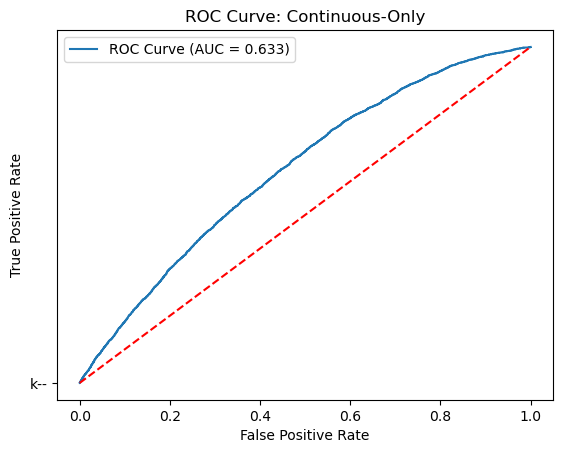

In [ ]:
y_prob = models['Continuous-Only'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Continuous-Only')
plt.legend()
plt.show()

This model is better at guessing an actually popular track compared to randomly guessing, but not as much as the categorical variable only model! This seems to tell me that categorical features are better for predicting popularity than the continuous variables.

The accuracy is 78% like the previous model but the sensitivity is 0.0! It does not accurately predict popular tracks.

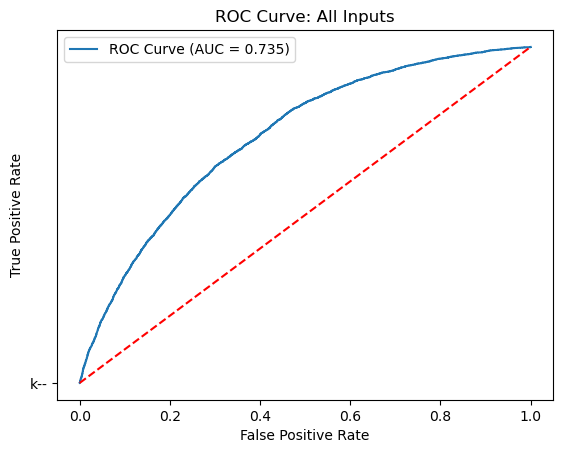

In [ ]:
y_prob = models['All Inputs'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: All Inputs')
plt.legend()
plt.show()

All inputs is the best out of the previous models so far with an AUC of 0.735. Combining categorical and continuous features has improved the models predicting power, but not by much compared to the categorical only model. Also though, with an accuracy of 0.79, the model is still far from perfect.


Accuracy is 79% with a sensitivity of 0.07. Clearly this model is also terrible since that means it only correctly identifies 7% of tracks... and correctly identifying 98% of not popular songs (specificity).

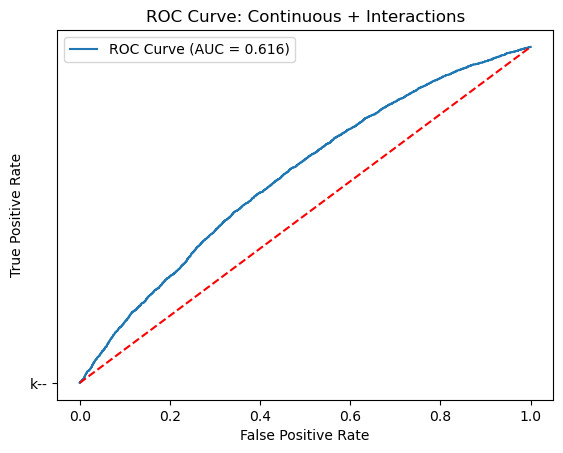

In [ ]:
y_prob = models['Continuous + Interactions'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Continuous + Interactions')
plt.legend()
plt.show()

This model is not good at predicting since it's score is 0.616... This is barely better than the random guessing.

With 78% accuracy and a 0.0019 sensitivity, this model is also .... drum roll... TERRIBLE! But it can accurately predict 99% of the not popular tracks (specificity).

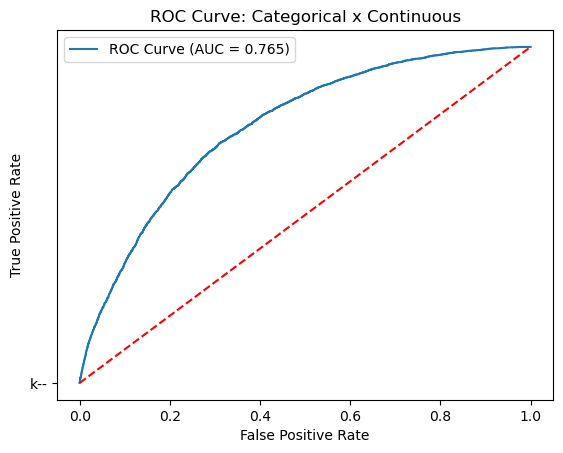

In [ ]:
y_prob = models['Categorical x Continuous'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Categorical x Continuous')
plt.legend()
plt.show()

Categorical by Continuous model is the best now so far, but just barely better than the all inputs model. This model improves the predictable probability!

With an accuracy of 79%, sensitivity of 16.9%, specificity of about 97%, and FPR of 0.03- This model is not good for popular tracks and still favors predicting not popular tracks like the rest of the models.

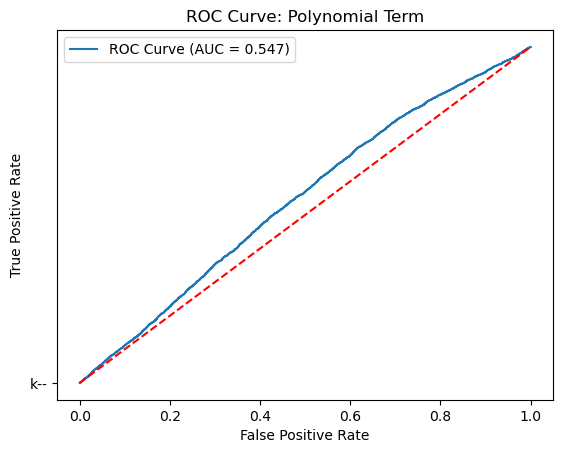

In [ ]:
y_prob = models['Polynomial Term'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Polynomial Term')
plt.legend()
plt.show()

Absolutely terrible at predicting for the polynomial model. Would NOT use this model.

This model at 78% accuracy is actually 100% able to predict tracks as not popular and 0% able to predict popular tracks.

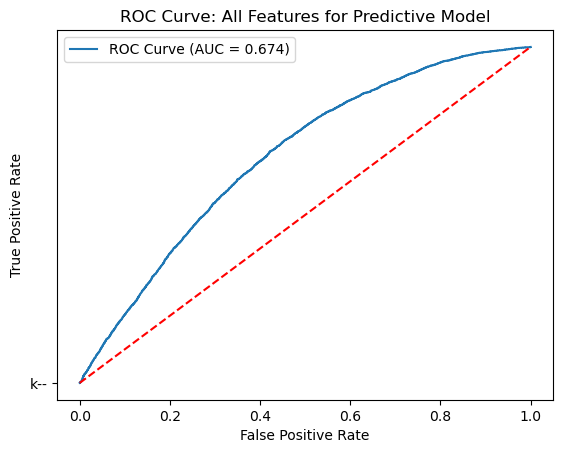

In [ ]:
# All Features for Predictive Model

y_prob = models['All Features for Predictive Model'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: All Features for Predictive Model')
plt.legend()
plt.show()

All features do not have an effect on making the model better at predicting popular tracks. It's barely better than random guessing and is better at predicting not popular songs.

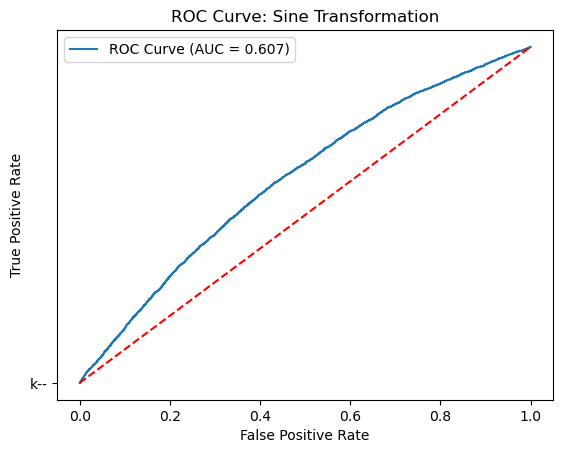

In [ ]:
y_prob = models['Sine Transformation'].predict(df2)

fpr_value, tpr_value, thresholds = roc_curve(df2['track_popularity'], y_prob)

# calculates AUC
auc_value = roc_auc_score(df2['track_popularity'], y_prob)

plt.figure()
plt.plot(fpr_value, tpr_value, label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1], 'r--','k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: Sine Transformation')
plt.legend()
plt.show()

This model is better than randomly guessing, but not strong at all, barely moderately good- Basically, it's barely better than flipping a coin. The accuracy of 78%, sensitivity of 0.0, and specificity of 0.99 once again means it is very bad at predicting popular tracks.

### `Overall, the best model is the categorical x continuous model.`

#### I'd have fantastic models for predicting not popular tracks, but for caring about popular tracks, I look at sensitivity (along with AUC), which the sensitivity is SO LOW on all them them.. sadly.

#### Categorical x continuous model has the "highest" sensitivity compared to the rest and highest AUC. It is able to be more effective at predicting a track's popularity than the rest.



## Models: Predictions

### Model 1: Best model on the training set (Categorical x Continuous)

In [ ]:
# create data sets to support visualizing the predictions

loudness_grid = pd.DataFrame({'loudness': np.linspace(df2['loudness'].min(), df2['loudness'].max(), num=101)})

In [ ]:
loudness_grid

loudness
0   -46.44800
1   -45.97077
2   -45.49354
3   -45.01631
4   -44.53908
..        ...
96   -0.63392
97   -0.15669
98    0.32054
99    0.79777
100   1.27500

[101 rows x 1 columns]

In [ ]:
# make a copy
df_viz = loudness_grid.copy()

In [ ]:
playlist_subgenre_onehot =ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                                  ['playlist_subgenre'])])
df_viz['playlist_subgenre_onehot']

In [ ]:
df_viz['danceability']=df2['danceability'].mean()
df_viz['energy']=df2['energy'].mean()
df_viz['acousticness']=df2['acousticness'].mean()
df_viz['speechiness']=df2['speechiness'].mean()
df_viz['instrumentalness']=df2['instrumentalness'].mean()
df_viz['valence']=df2['valence'].mean()
df_viz['liveness']=df2['liveness'].mean()
df_viz['tempo']=df2['tempo'].mean()
df_viz['duration_ms']=df2['duration_ms'].mean()
df_viz['playlist_subgenre']=df2['playlist_subgenre'].mode()[0]
df_viz['playlist_genre']=df2['playlist_genre'].mode()[0]
df_viz['key']=df2['key'].mode()[0]
df_viz['mode']=df2['mode'].mode()[0]

In [ ]:
# new column for predicted probability from logistic regression model

df_viz['pred_probability'] = model_cat_cont_both.predict( df_viz )

In [ ]:
df_viz

loudness  danceability    energy  acousticness  pred_probability  \
0   -46.44800       0.65451  0.691256       0.18592          0.000087   
1   -45.97077       0.65451  0.691256       0.18592          0.000090   
2   -45.49354       0.65451  0.691256       0.18592          0.000094   
3   -45.01631       0.65451  0.691256       0.18592          0.000097   
4   -44.53908       0.65451  0.691256       0.18592          0.000100   
..        ...           ...       ...           ...               ...   
96   -0.63392       0.65451  0.691256       0.18592          0.002365   
97   -0.15669       0.65451  0.691256       0.18592          0.002448   
98    0.32054       0.65451  0.691256       0.18592          0.002533   
99    0.79777       0.65451  0.691256       0.18592          0.002621   
100   1.27500       0.65451  0.691256       0.18592          0.002713   

    playlist_subgenre playlist_genre  speechiness  instrumentalness   valence  \
0     indie poptimism            rap     0.108423          0.093542  0.508392   
1     indie poptimism            rap     0.108423          0.093542  0.508392   
2     indie poptimism            rap     0.108423          0.093542  0.508392   
3     indie poptimism            rap     0.108423          0.093542  0.508392   
4     indie poptimism            rap     0.108423          0.093542  0.508392   
..                ...            ...          ...               ...       ...   
96    indie poptimism            rap     0.108423          0.093542  0.508392   
97    indie poptimism            rap     0.108423          0.093542  0.508392   
98    indie poptimism            rap     0.108423          0.093542  0.508392   
99    indie poptimism            rap     0.108423          0.093542  0.508392   
100   indie poptimism            rap     0.108423          0.093542  0.508392   

     liveness       tempo   duration_ms  key  mode  
0    0.188791  120.993484  223641.04377    1     1  
1    0.188791  120.993484  223641.04377    1     1  
2    0.188791  120.993484  223641.04377    1     1  
3    0.188791  120.993484  223641.04377    1     1  
4    0.188791  120.993484  223641.04377    1     1  
..        ...         ...           ...  ...   ...  
96   0.188791  120.993484  223641.04377    1     1  
97   0.188791  120.993484  223641.04377    1     1  
98   0.188791  120.993484  223641.04377    1     1  
99   0.188791  120.993484  223641.04377    1     1  
100  0.188791  120.993484  223641.04377    1     1  

[101 rows x 15 columns]

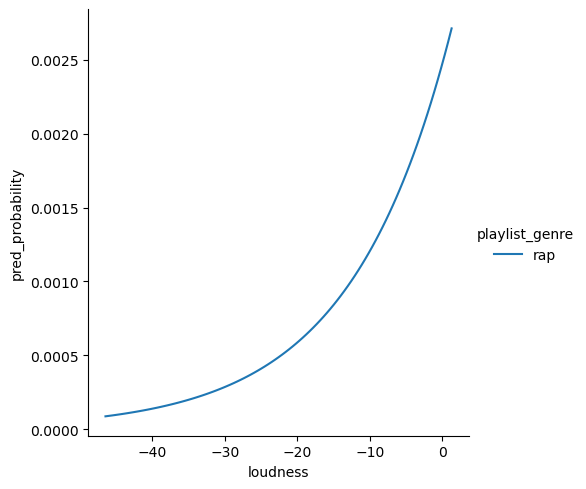

In [ ]:
#visualize predicted probability with respect to the INPUT in the visualization grid

sns.relplot(data=df_viz, x='loudness', y='pred_probability', kind='line', hue='playlist_genre')

plt.show()

The shape of this appears as a backward L because loudness is measured in negative decibels in the data set, and closer to 0 = louder. The increase in predicted probability happens exactly like in the distribution of loudness histogram, where the distribution is beginning to peak upward at around -10 dB.


### Model 2: Model with ALL inputs and linear additive features

In [ ]:
df_viz2 = loudness_grid.copy()

In [ ]:
df2.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=True)

playlist_genre
edm      0.077463
rap      0.212653
r&b      0.213717
latin    0.231586
rock     0.279453
pop      0.280606
Name: track_popularity, dtype: float64

In [ ]:
# Create 101-point grid for loudness
loudness_values = np.linspace(df2['loudness'].min(), df2['loudness'].max(), 101)

# 5 points for energy continuous
energy_values = np.linspace(df2['energy'].min(), df2['energy'].max(), 5)

# all playlist genres categorical
genres = df2['playlist_genre'].unique()

# make the grid - Used google AI for help on the len() part of this code and .repeat and .title
df_viz2 = pd.DataFrame({
    'loudness': np.tile(loudness_values, len(energy_values) * len(genres)),
    'energy': np.repeat(np.tile(energy_values, len(loudness_values)), len(genres)),
    'playlist_genre': np.repeat(genres, len(loudness_values) * len(energy_values))})

# all other inputs constant
df_viz2['danceability'] = df2['danceability'].mean()
df_viz2['acousticness'] = df2['acousticness'].mean()
df_viz2['speechiness'] = df2['speechiness'].mean()
df_viz2['instrumentalness'] = df2['instrumentalness'].mean()
df_viz2['liveness'] = df2['liveness'].mean()
df_viz2['valence'] = df2['valence'].mean()
df_viz2['tempo'] = df2['tempo'].mean()
df_viz2['duration_ms'] = df2['duration_ms'].mean()
df_viz2['mode'] = df2['mode'].mode()[0]
df_viz2['playlist_subgenre']=df2['playlist_subgenre'].mode()[0]
df_viz2['key']=df2['key'].mode()[0]

In [ ]:
df_viz2['pred_probability']= all_inputs_model.predict(df_viz2)

In [ ]:
df_viz2.shape

(3030, 15)

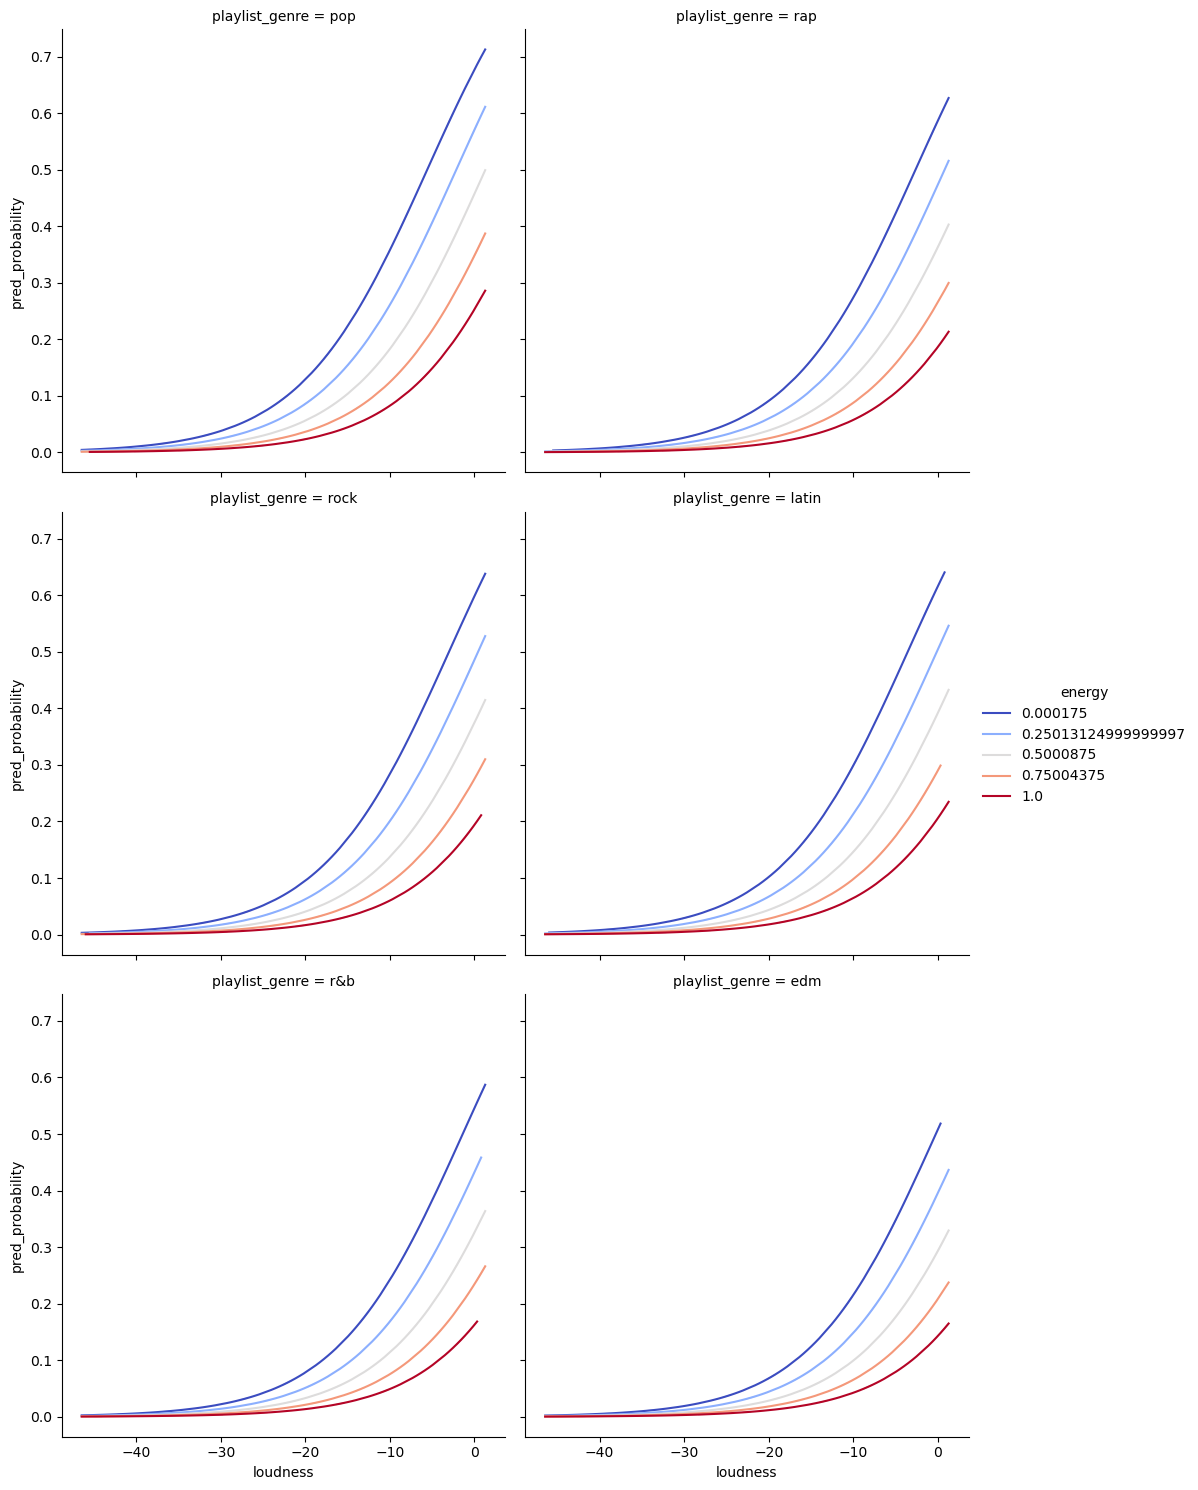

In [ ]:
# vizualize

sns.relplot(data=df_viz2, x='loudness', y='pred_probability', hue='energy', col='playlist_genre', kind='line',
            palette='coolwarm', col_wrap=2, aspect=1)

plt.show()

`energy` is the colors being represented at 5 values. All charts appear to have predicted popularity increase as loudness increases but is slightly lower for edm and r&b. Lower energy tracks have lower probability in all genres. There is not crossover between the energy values in each genre. This tells me loudness has a positive effect on predicted popularity across all genres. However, this chart tells me that higher energy may slightly decrease predicted probability as it is the bottom red line below the rest. This is consistent with the track popularity and energy chart because even though they are positively correlated, the data all around was still scattered between 0-100. Which means there are still many popular songs that don't have a lot of energy!

In [ ]:
all_inputs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       track_popularity   No. Observations:                21293
Model:                          Logit   Df Residuals:                    21242
Method:                           MLE   Df Model:                           50
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                  0.1139
Time:                        12:35:14   Log-Likelihood:                -9781.6
converged:                       True   LL-Null:                       -11039.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -0.6263   9.02e+05  -6.94e-07      1.000   -1.77e+06    1.77e+06
C(playlist_genre)[T.latin]                            0.4404   7.43e+06   5.93e-08      1.000   -1.46e+07    1.46e+07
C(playlist_genre)[T.pop]                              0.7071        nan        nan        nan         nan         nan
C(playlist_genre)[T.r&b]                              0.1518   3.36e+06   4.52e-08      1.000   -6.58e+06    6.58e+06
C(playlist_genre)[T.rap]                              0.3175   1.97e+06   1.61e-07      1.000   -3.85e+06    3.85e+06
C(playlist_genre)[T.rock]                             0.3667   9.02e+05   4.06e-07      1.000   -1.77e+06    1.77e+06
C(key)[T.1]                                           0.0178      0.074      0.241      0.810      -0.127       0.163
C(key)[T.2]                                          -0.0288      0.080     -0.361      0.718      -0.185       0.128
C(key)[T.3]                                          -0.0545      0.119     -0.459      0.646      -0.288       0.178
C(key)[T.4]                                           0.0062      0.087      0.071      0.943      -0.164       0.176
C(key)[T.5]                                           0.1125      0.081      1.381      0.167      -0.047       0.272
C(key)[T.6]                                          -0.0461      0.085     -0.542      0.588      -0.213       0.121
C(key)[T.7]                                          -0.0830      0.078     -1.069      0.285      -0.235       0.069
C(key)[T.8]                                          -0.0011      0.084     -0.013      0.990      -0.166       0.164
C(key)[T.9]                                          -0.0199      0.079     -0.254      0.800      -0.174       0.134
C(key)[T.10]                                          0.0339      0.087      0.388      0.698      -0.137       0.205
C(key)[T.11]                                         -0.0346      0.082     -0.424      0.671      -0.195       0.125
C(mode)[T.1]                                          0.0752      0.038      1.972      0.049       0.000       0.150
C(playlist_subgenre)[T.big room]                     -1.1250   9.02e+05  -1.25e-06      1.000   -1.77e+06    1.77e+06
C(playlist_subgenre)[T.classic rock]                  0.7486      0.138      5.420      0.000       0.478       1.019
C(playlist_subgenre)[T.dance pop]                     0.0083        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.electro house]                -0.8344   9.02e+05  -9.25e-07      1.000   -1.77e+06    1.77e+06
C(playlist_subgenre)[T.electropop]                    0.1744        nan        nan        nan         nan         nan
C(playlist_subgenre)[T.gangster rap]                 -0.2842   1.94e+06  -1.47e-07      1.000    -3.8e+06     3.8e+06
C(playlist_subgenre)[T.hard rock]                     0

In [ ]:
df2[['loudness','energy','track_popularity']].corr()

loudness    energy  track_popularity
loudness          1.000000  0.690167          0.056977
energy            0.690167  1.000000         -0.052081
track_popularity  0.056977 -0.052081          1.000000

In [ ]:
# plot the two models visualizations/ predictions of the event probability

df_viz2['pred_best'] = model_cat_cont_both.predict(df_viz2)
df_viz2['pred_all_features'] = all_inputs_model.predict(df_viz2)

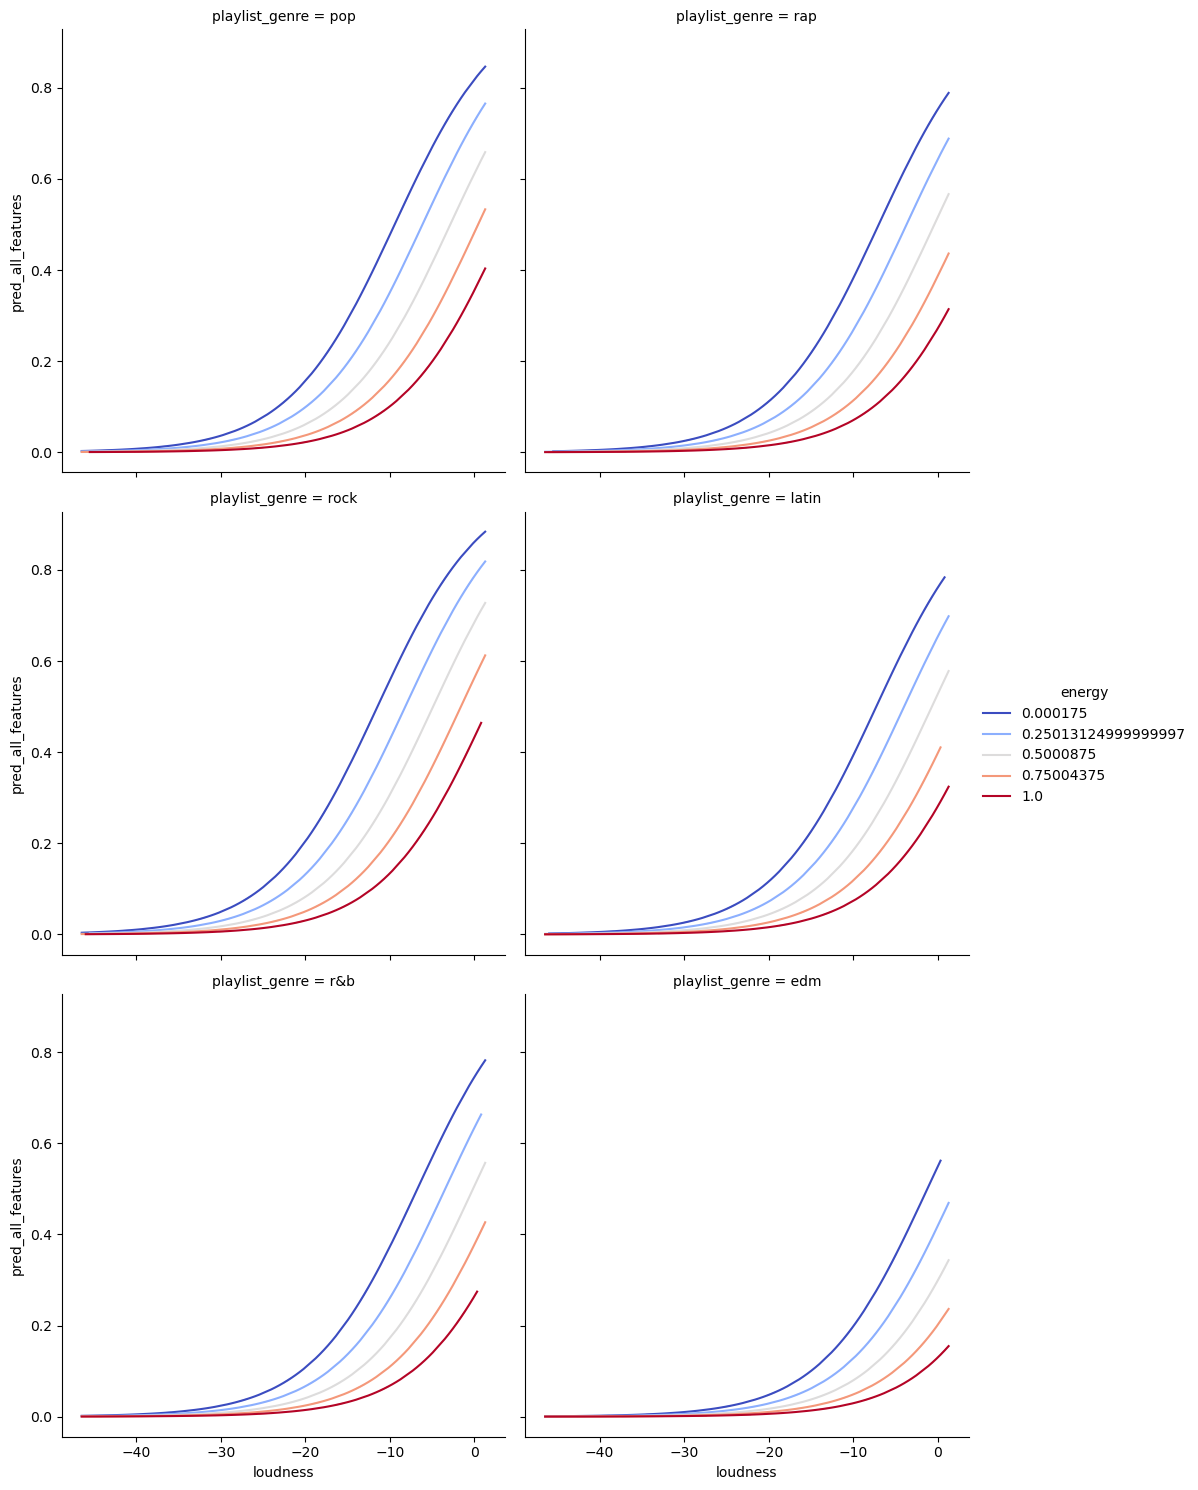

In [ ]:
sns.relplot(data=df_viz2, x='loudness', y='pred_all_features', hue='energy', col='playlist_genre',
            kind='line', palette='coolwarm', col_wrap=2, aspect=1)

plt.show()

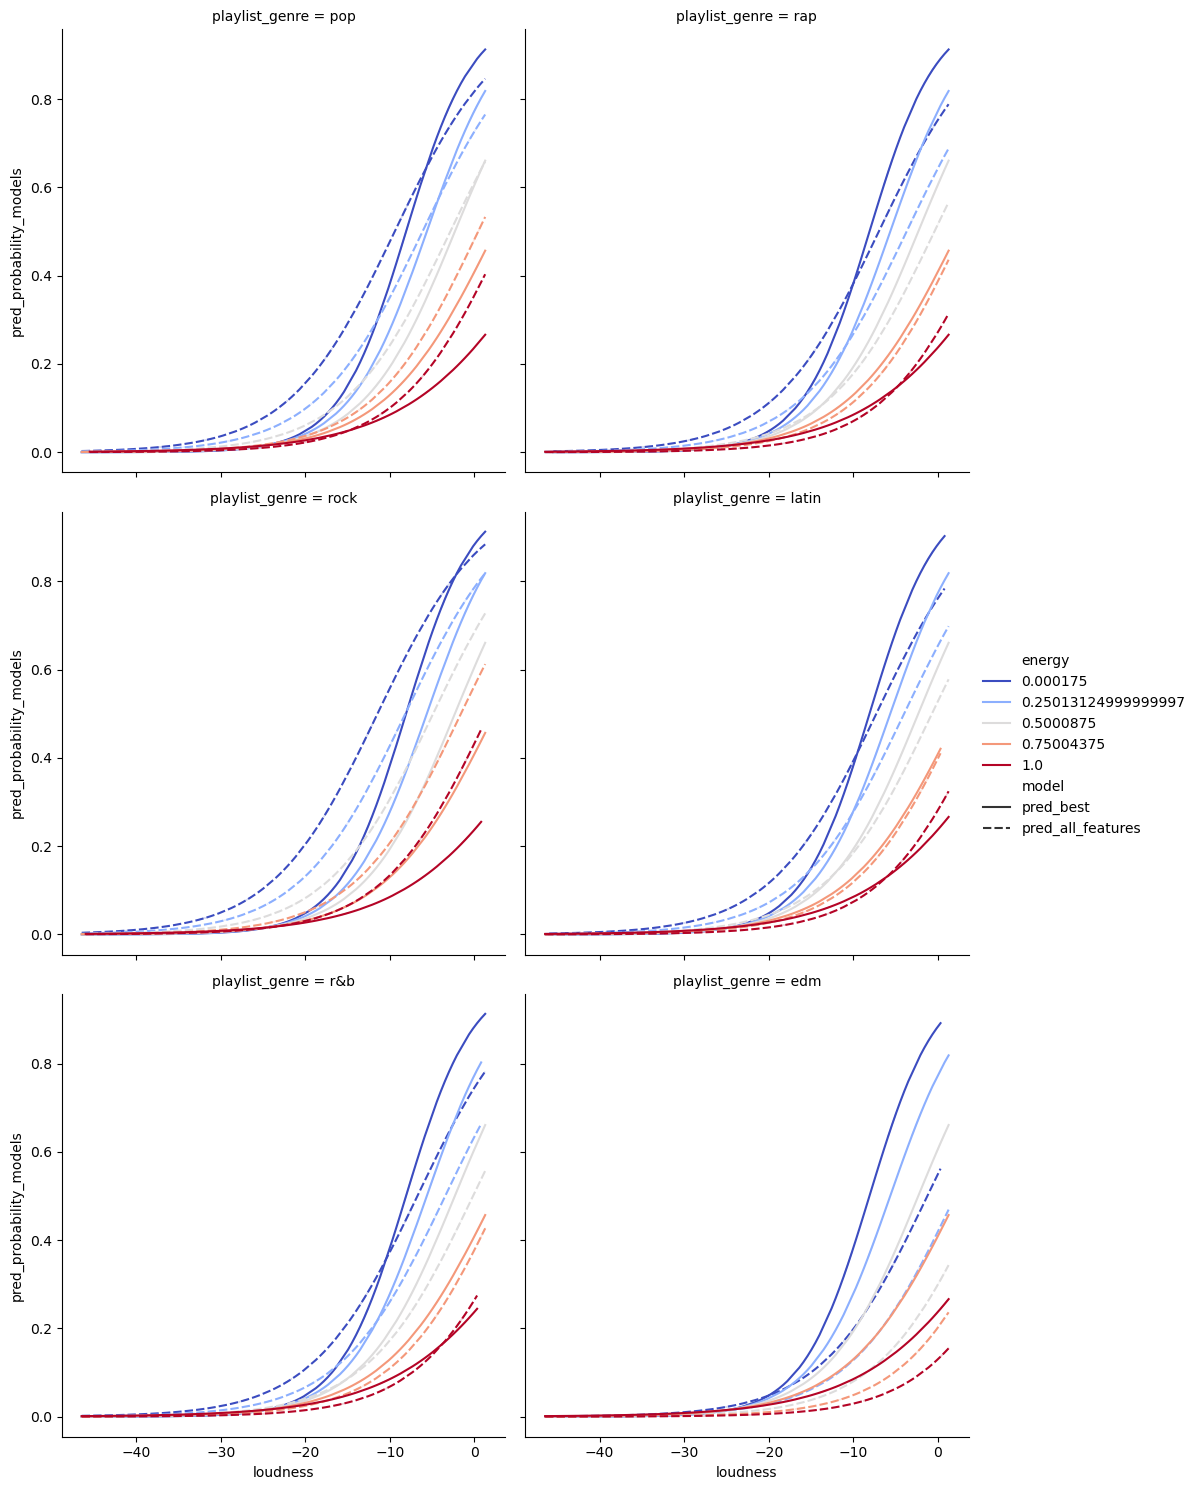

In [ ]:


# Melt predictions into long format
df_melt = df_viz2.melt(
    id_vars=['loudness', 'energy', 'playlist_genre'],
    value_vars=['pred_best', 'pred_all_features'],
    var_name='model',
    value_name='pred_probability_models'
)

# Plot both models
sns.relplot(
    data=df_melt,
    x='loudness',
    y='pred_probability_models',
    hue='energy',
    col='playlist_genre',
    style='model',  # differentiate models by line style
    kind='line',
    palette='coolwarm', # diverging for continuous
    col_wrap=2,
    aspect=1
)

plt.show()

#### Interpretation and trends between the two models

* Loudness increases across all genres which tells me genre does not have a strong effect in this visualization.
* The predictions for energy in r&b, rap, and latin are all very close to the best model at 1.0.
* Some genres have the two models predicting energy differently such as energy at 0.000175 across all genres.
* Overall, this tells me energy and genre only have minor effects here.

## Model Performance and Validation

Since I turned this into a binary classification problem, I will use stratified 5-fold cross-validation and AUC as the performance metric.

Additionally, I cannot use cross validation with statsmodels .fit() models since they are trained and don't refit per fold! So, we have to use my formulas as scikit-learn pipelines to be able to evaluate them in cross-validation. I have to use StratifiedKFold since accuracy/F1/AUC can get disorted. One of the best meaurements is AUC so I will use this.

Since I can't scale the dataset first, I have to use Pipeline.

The order of the model performance is:

* Simple Model
* Best Model on training set
* Medium complex model

#### Import modules:

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Model 1: Simple Model

In [ ]:
# use one hot encoder to handle categorical variables!

fix_cat_onehot = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                                  ['playlist_genre', 'key', 'playlist_subgenre', 'mode'])])

# pipeline process

simple_model_1 = Pipeline([('prep', fix_cat_onehot),
                           ('clf', LogisticRegression(max_iter=2000))])

In [ ]:
simple_model_1

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['playlist_genre', 'key',
                                                   'playlist_subgenre',
                                                   'mode'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [ ]:
# use 5-fold CV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv.get_n_splits()

5

In [ ]:
# run cross validation

simple_model_score= cross_val_score(simple_model_1, df2[['playlist_genre', 'key', 'playlist_subgenre', 'mode']], df2['track_popularity'], cv=cv, scoring='roc_auc')

In [ ]:
# mean & 95% CI's for average cross validation performance and CI

simple_model_mean = simple_model_score.mean()
simple_model_std = simple_model_score.std()
simple_model_lowerCI= simple_model_mean - 1.96 * simple_model_std / np.sqrt(len(simple_model_score))
simple_model_upperCI= simple_model_mean + 1.96 * simple_model_std / np.sqrt(len(simple_model_score))

In [ ]:
print("Mean AUC:", simple_model_mean)
print("95% CI:", (simple_model_lowerCI, simple_model_upperCI))

Mean AUC: 0.701836291893207
95% CI: (np.float64(0.691530300879809), np.float64(0.7121422829066049))


#### Interpretation of Categorical Variable Model (simple model)

* 0.702 AUC means the model is fairly good at correctly choosing popular tracks 70% of the time.
* A CI range of 0.69-0.71 indicates there is very little uncertainty! This tells us the model performance is stable.
* Overall, since it's a less complex it is less likely to overfit, but since AUC is not extremely high, adding other numeric features and interactions could improve it's predictive probability.

# Model 2: Best Model on the training set

In [ ]:
# define x and y

X_best =df2[['playlist_subgenre','danceability','energy','acousticness','loudness']]
y_best = df2['track_popularity']

In [ ]:
# one hot categorical and scale numeric variables

onehot_playlistsubgenre = ColumnTransformer([('cat', OneHotEncoder(drop='first'), ['playlist_subgenre']),
    ('num', StandardScaler(), ['danceability','energy','acousticness','loudness'])])

In [ ]:
# pipeline

best_model_pipeline = Pipeline([('preprocess', onehot_playlistsubgenre),
    ('interact', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('clf', LogisticRegression(max_iter=5000))])

In [ ]:
best_model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['playlist_subgenre']),
                                                 ('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'acousticness',
                                                   'loudness'])])),
                ('interact',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('clf', LogisticRegression(max_iter=5000))])

In [ ]:
# use 5-fold CV

cv2= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv2.get_n_splits()

5

In [ ]:
# run cross validation

best_model_score = cross_val_score(best_model_pipeline, X_best, y_best, cv=cv, scoring='roc_auc')

In [ ]:
# mean & 95% CI's for average cross validation performance

best_model_mean = best_model_score.mean()
best_model_std = best_model_score.std()
best_model_lowerCI = best_model_mean - 1.96 * best_model_std / np.sqrt(len(best_model_score))
best_model_upperCI = best_model_mean + 1.96 * best_model_std / np.sqrt(len(best_model_score))

In [ ]:
print("Mean AUC:", best_model_mean)
print("95% CI:", (best_model_lowerCI, best_model_upperCI))

Mean AUC: 0.7293913702249901
95% CI: (np.float64(0.7202881471523312), np.float64(0.738494593297649))


#### Interpretation for best model on training set

* An AUC mean for this model is about 73%, which is improvement from the simple model.
* This shows that categorical and numeric interations help with predictive performance!
* The models performance is consistently between 0.72-0.738 which means it is stable across the folds!!
* Overall, using 5-fold stratified cross-validation still confirmed that including interactions with the categorical variable improves predictive ability.

In [ ]:
# Model 3: Medium complex model- Sin Model

In [ ]:
# define X and y for model

X_sin = df2[['tempo','danceability','energy','acousticness','loudness']]
y_sin = df2['track_popularity']

In [ ]:
# apply np.sin to tempo for scaling

sin_transformer= FunctionTransformer(np.sin)

sin_preprocess= ColumnTransformer([
    ('num', StandardScaler(), ['danceability','energy','acousticness','loudness']),
    ('tempo', sin_transformer, ['tempo'])])

In [ ]:
# use pipeline

sin_model_pipeline= Pipeline([('preprocess', sin_preprocess),
                              ('clf', LogisticRegression(max_iter=5000))])

In [ ]:
sin_model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'acousticness',
                                                   'loudness']),
                                                 ('tempo',
                                                  FunctionTransformer(func=<ufunc 'sin'>),
                                                  ['tempo'])])),
                ('clf', LogisticRegression(max_iter=5000))])

In [ ]:
# use 5 fold

cv3= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv3.get_n_splits()

5

In [ ]:
# run cross validation

sin_model_score = cross_val_score(sin_model_pipeline, X_sin, y_sin, cv=cv3, scoring='roc_auc')

In [ ]:
# mean & 95% CI's for average cross validation performance

sin_model_mean = sin_model_score.mean()
sin_model_std = sin_model_score.std()
sin_model_lowerCI = sin_model_mean - 1.96 * sin_model_std / np.sqrt(len(sin_model_score))
sin_model_upperCI = sin_model_mean + 1.96 * sin_model_std / np.sqrt(len(sin_model_score))

In [ ]:
print("Mean AUC:", sin_model_mean)
print("95% CI:", (sin_model_lowerCI, sin_model_upperCI))

Mean AUC: 0.6059001865229969
95% CI: (np.float64(0.6003034619179721), np.float64(0.6114969111280217))


#### Interpretation of medium complex model

* The mean AUC is much less than the other two model's performance, so this model is barely better than flipping a coin.
* The performance is low across folds and a CI range of 0.6 - 0.611 confirms sin did not help for classification in this data set.
* Overall, it is "complex" but complexity clearly does not guarentee better predictive power!


## Conclusions of performance of models:

* Overall, the best model that was on the training set also did the best according to cross-validation.



## End

## Limitations

In this data set, there was significantly less data for very popular tracks. A large portion of the tracks in this set were tracks that had medium popularity. This means regression or classification can show very accurate data analysis for medium popular tracks, but will be less accurate for very popular songs.

If I got to start over, and I sorted the data by popular track artist earlier, I could have looked into what makes their specific songs very popular. Yet, I would have likely found very little significance of the continuous variables again.

Additionally, I did not combine variables such as loudness and energy. Since loudness is included in energy's description, I could have combined them together.


## References

Google Search, AI response for extra parts of the graphs/charts that was not specifically taught in class with sizing, titles and a for-loop for a chart

Tidy Tuesday Data Dictionary: https://github.com/rfordatascience/tidytuesday/tree/main/data/2020/2020-01-21#readme

EDM Music Mastering & Loudness: https://gearspace.com/board/mastering-forum/764006-edm-music-mastering-amp-loudness.html

Decibels in Music and Audio Everything You Need to Know: https://decibel.shop/blogs/stories-about-noise-sound-and-life/decibels-in-music-and-audio-everything-you-need-to-know#:~:text=and%20acoustic%20treatment.-,What%20dB%20Level%20Should%20a%20Song%20Be%3F,experience%20across%20different%20playback%20systems.

matplotlib List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
